# Antibiotics usage and awareness within the European Union

This data was sourced from https://data.europa.eu/data/datasets/s2190_90_1_478_eng?locale=en. It contains an excel file with 73 sheets containing data from a wide range of issues but my focus is basically on those aimed at assessing the awareness level of antibiotics abuse among persons in the European Union (EU). Abuse of antibiotics is said to be one of the leading causes of antibiotics resistance
I hope to be able to address the following questions from tha available data
1. What is the average rate of antibiotics usage within the region?
2. Part of fighting antibiotics resistance lies in regulating access to antibiotics, can antibiotics be obtained in EU without medical prescription?
3. Are the people within the region informed enough on how antbiotics are abused?

I have to first load the necessary data analyses libraries

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno

The Excel file has to be loaded using the pandas' "ExcelFile" function

In [5]:
EU_antibiotics = pd.ExcelFile("EU_antibiotics_country.xls")
print(EU_antibiotics.sheet_names)

['Index', 'B2', 'Q1NAT', 'QC1', 'QC2', 'QC3', 'QC4', 'QC5.1', 'QC5.2', 'QC5.3', 'QC5.4', 'QC5.5', 'QC5R', 'QC6', 'QC7', 'QC8', 'QC9', 'QC10', 'QC11', 'QC12', 'QC13', 'QC14', 'QC15', 'D1.1', 'D1.2', 'D1.3', 'D7.1', 'D7.2', 'D7.3', 'D8', 'D10', 'D11', 'D112', 'D15a.1', 'D15a.2', 'C14', 'D15b.1', 'D15b.2', 'D25', 'D40a', 'D40b', 'D40c', 'D40R', 'D40', 'D43a', 'D43b', 'D43', 'D60', 'D62.1', 'D62.2', 'D62.3', 'D62.4', 'D62R', 'D63', 'D70', 'D79', 'D71.1', 'D71.2', 'D71.3', 'C1', 'C2', 'D72.1', 'D72.2', 'D72.3', 'D73.1', 'D73.2', 'D77', 'D78', 'D80a', 'D80b', 'D81', 'D82', 'D83']


Listed above are the titles of the varied excel sheets each addressing a unique question. As per custom, the "Index"  sheet should contain details of the content of the other files. So I will take a look at it and its content

In [6]:
df= pd.read_excel(EU_antibiotics, "Index")
df.head(10)


B2'!A1                                             B Pays  \
0  Q1NAT'!A1  Q1NAT Quelle est votre nationalité ? Veuillez ...   
1    QC1'!A1  QC1 Avez-vous pris des antibiotiques par voie ...   
2    QC2'!A1  QC2 Comment avez-vous obtenu le dernier traite...   
3    QC3'!A1  QC3 Quelle était la raison pour laquelle vous ...   
4    QC4'!A1  QC4 Avez-vous fait un examen, tel qu'une prise...   
5  QC5.1'!A1  QC5.1 Pour chacune des propositions suivantes,...   
6  QC5.2'!A1  QC5.2 Pour chacune des propositions suivantes,...   
7  QC5.3'!A1  QC5.3 Pour chacune des propositions suivantes,...   
8  QC5.4'!A1  QC5.4 Pour chacune des propositions suivantes,...   
9  QC5.5'!A1  QC5.5 Pour chacune des propositions suivantes,...   

                                          Unnamed: 2  \
0                                                NaN   
1                                                NaN   
2                                                NaN   
3                                                NaN   
4                                                NaN   
5                  Les antibiotiques tuent les virus   
6  Les antibiotiques sont efficaces contre le rhume    
7  La prise inutile d’antibiotiques les rend inef...   
8  La prise d’antibiotiques a souvent des effets ...   
9                                            Moyenne   

                  Unnamed: 3  \
0                        NaN   
1      ('QUESTION SENSIBLE')   
2  (SI 'OUI', CODE 1 EN QC1)   
3  (SI 'OUI', CODE 1 EN QC1)   
4  (SI 'OUI', CODE 1 EN QC1)   
5                        NaN   
6                        NaN   
7                        NaN   
8                        NaN   
9                        NaN   

                                           B Country  \
0  Q1NAT What is your nationality? Please tell me...   
1  QC1 Have you taken any antibiotics orally such...   
2  QC2 How did you obtain the last course of anti...   
3  QC3 What was the reason for last taking the an...   
4  QC4 Did you have a test, for example a blood o...   
5  QC5.1 For each of the following statements, pl...   
6  QC5.2 For each of the following statements, pl...   
7  QC5.3 For each of the following statements, pl...   
8  QC5.4 For each of the following statements, pl...   
9  QC5.5 For each of the following statements, pl...   

                                          Unnamed: 5  \
0                                                NaN   
1                                                NaN   
2                                                NaN   
3                                                NaN   
4                                                NaN   
5                           Antibiotics kill viruses   
6           Antibiotics are effective against colds    
7  Unnecessary use of antibiotics makes them beco...   
8  Taking antibiotics often has side-effects such...   
9                                            Average   

                  Unnamed: 6  
0                        NaN  
1     ('SENSITIVE QUESTION')  
2  (IF 'YES', CODE 1 IN QC1)  
3  (IF 'YES', CODE 1 IN QC1)  
4  (IF 'YES', CODE 1 IN QC1)  
5                        NaN  
6                        NaN  
7                        NaN  
8                        NaN  
9                        NaN

The column "B2'!A1" apparently contains the number tags to each question, the column "B Pays" contains the French translation of each question posed to the respondents. Certain questions are subdivided into versions like 5.1, 5.2 etc. Such subdivisions are contained in the column named "Unnamed:2". The "B Country" contains the English translation of the details of the subsequent excel sheets with "Unnamed:5" the English version of the subdivided questions.

Of interest to me are the questions (as written in English), as they determine which of the sheets are relevant to me, thus I will need to print out the contents of the "B Country" column

In [7]:
list(df["B Country"])

['Q1NAT What is your nationality? Please tell me the country(ies) that applies(y). MULTIPLE ANSWERS POSSIBLE',
 'QC1 Have you taken any antibiotics orally such as tablets, powder or syrup in the last 12 months? ',
 'QC2 How did you obtain the last course of antibiotics that you used? ',
 'QC3 What was the reason for last taking the antibiotics that you used? (MULTIPLE ANSWERS POSSIBLE)',
 'QC4 Did you have a test, for example a blood or urine test, or throat swab, to find out what was causing your illness, before or at the same time as you started antibiotics ? ',
 'QC5.1 For each of the following statements, please tell me whether you think it is true or false. ',
 'QC5.2 For each of the following statements, please tell me whether you think it is true or false. ',
 'QC5.3 For each of the following statements, please tell me whether you think it is true or false. ',
 'QC5.4 For each of the following statements, please tell me whether you think it is true or false. ',
 'QC5.5 For each 

From the list above, it is clear that only questions 1 to 15 (DC1 - QC15) are relevant to antibiotics. I will limit my analyses to the few I think are most relevant to the answers I intend to find. I will thus be analysing Questions 1 to 5(with all the sub-questions in 5), questions 6, 7, 8, 12 and 15

I however have to check the "B2" sheet  as it asks the question "What is your nationality". This should give me an idea of the participating EU countries and an idea of the data layout in the sheets

In [8]:
Nationality = pd.read_excel(EU_antibiotics, "B2")
Nationality.head(20)

Index Unnamed: 1                 Unnamed: 2 Unnamed: 3 Unnamed: 4  \
0     NaN        NaN  VOLUME A Pondéré Weighted        NaN        NaN   
1     NaN     B Pays                        NaN        NaN        NaN   
2     NaN        NaN                        NaN        NaN        NaN   
3     NaN        NaN                        NaN        NaN        NaN   
4     NaN        NaN                        NaN        NaN        NaN   
5     NaN        NaN                        NaN        NaN        NaN   
6     NaN        NaN                        NaN        NaN        NaN   
7     NaN        NaN                 UE28\nEU28         BE         BG   
8     NaN      TOTAL                      27474       1018       1040   
9     NaN   BELGIQUE                        617       1018          0   
10    NaN        NaN                       0.02          1         -    
11    NaN    DANMARK                        308          0          0   
12    NaN        NaN                       0.01         -          -    
13    NaN     ELLADA                        633          0          0   
14    NaN        NaN                       0.02         -          -    
15    NaN     ESPANA                       2512          0          0   
16    NaN        NaN                       0.09         -          -    
17    NaN      SUOMI                        302          0          0   
18    NaN        NaN                       0.01         -          -    
19    NaN     FRANCE                       3445          0          0   

   Unnamed: 5 Eurobarometer 90.1 Unnamed: 7 Unnamed: 8 Unnamed: 9  ...  \
0         NaN                NaN        NaN        NaN        NaN  ...   
1         NaN                NaN        NaN        NaN        NaN  ...   
2         NaN                NaN        NaN        NaN        NaN  ...   
3         NaN                NaN        NaN        NaN        NaN  ...   
4         NaN                NaN        NaN        NaN        NaN  ...   
5         NaN                NaN        NaN        NaN        NaN  ...   
6         NaN                NaN        NaN        NaN        NaN  ...   
7          CZ                 DK        D-W         DE        D-E  ...   
8        1012               1015       1006       1507        501  ...   
9           0                  0          0          0          0  ...   
10         -                  -          -          -          -   ...   
11          0               1015          0          0          0  ...   
12         -                   1         -          -          -   ...   
13          0                  0          0          0          0  ...   
14         -                  -          -          -          -   ...   
15          0                  0          0          0          0  ...   
16         -                  -          -          -          -   ...   
17          0                  0          0          0          0  ...   
18         -                  -          -          -          -   ...   
19          0                  0          0          0          0  ...   

   Unnamed: 23 Unnamed: 24 Unnamed: 25 Unnamed: 26 Unnamed: 27 Unnamed: 28  \
0          NaN         NaN         NaN         NaN         NaN         NaN   
1          NaN         NaN         NaN         NaN         NaN         NaN   
2          NaN         NaN         NaN         NaN         NaN         NaN   
3          NaN         NaN         NaN         NaN         NaN         NaN   
4          NaN         NaN         NaN         NaN         NaN         NaN   
5          NaN         NaN         NaN         NaN         NaN         NaN   
6          NaN         NaN         NaN         NaN         NaN         NaN   
7           NL          AT          PL          PT          RO          SI   
8         1044        1007        1034        1016        1007        1018   
9            0           0           0           0           0           0   
10          -           -           -           -        

After a lot of pre_analyses and taking a look at the excel sheet, I can see that the relevant information  is contained from row number 8 thus I will be skipping all the rows before row 8. I will also drop the column "UE28\nEU28" as it gives the weighted number of the respondents which I do not consider relevant

In [9]:
#Read the "B2" data
Nationality= pd.read_excel(EU_antibiotics, "B2", skiprows = 7, header = [1])

#Drop the "UE28\nEU28" as it is not relevant to this analyses. It specifies the percentage of  respondents in the EU sample
Nationality= Nationality.drop(["UE28\nEU28", "Unnamed: 0"], axis = 1)

#Rename the #Unnamed:1" column to "Country"
Nationality.rename(columns ={"Unnamed: 1":"Country"}, inplace = True)

Nationality.head(20)

Country    BE    BG    CZ    DK   D-W    DE  D-E    EE    IE  ...  \
0        TOTAL  1018  1040  1012  1015  1006  1507  501  1017  1001  ...   
1     BELGIQUE  1018     0     0     0     0     0    0     0     0  ...   
2          NaN     1    -     -     -     -     -    -     -     -   ...   
3      DANMARK     0     0     0  1015     0     0    0     0     0  ...   
4          NaN    -     -     -      1    -     -    -     -     -   ...   
5       ELLADA     0     0     0     0     0     0    0     0     0  ...   
6          NaN    -     -     -     -     -     -    -     -     -   ...   
7       ESPANA     0     0     0     0     0     0    0     0     0  ...   
8          NaN    -     -     -     -     -     -    -     -     -   ...   
9        SUOMI     0     0     0     0     0     0    0     0     0  ...   
10         NaN    -     -     -     -     -     -    -     -     -   ...   
11      FRANCE     0     0     0     0     0     0    0     0     0  ...   
12         NaN    -     -     -     -     -     -    -     -     -   ...   
13     IRELAND     0     0     0     0     0     0    0     0  1001  ...   
14         NaN    -     -     -     -     -     -    -     -      1  ...   
15      ITALIA     0     0     0     0     0     0    0     0     0  ...   
16         NaN    -     -     -     -     -     -    -     -     -   ...   
17  LUXEMBOURG     0     0     0     0     0     0    0     0     0  ...   
18         NaN    -     -     -     -     -     -    -     -     -   ...   
19   NEDERLAND     0     0     0     0     0     0    0     0     0  ...   

      NL    AT    PL    PT    RO    SI    SK    FI    SE    UK  
0   1044  1007  1034  1016  1007  1018  1042  1011  1011  1000  
1      0     0     0     0     0     0     0     0     0     0  
2     -     -     -     -     -     -     -     -     -     -   
3      0     0     0     0     0     0     0     0     0     0  
4     -     -     -     -     -     -     -     -     -     -   
5      0     0     0     0     0     0     0     0     0     0  
6     -     -     -     -     -     -     -     -     -     -   
7      0     0     0     0     0     0     0     0     0     0  
8     -     -     -     -     -     -     -     -     -     -   
9      0     0     0     0     0     0     0  1011     0     0  
10    -     -     -     -     -     -     -      1    -     -   
11     0     0     0     0     0     0     0     0     0     0  
12    -     -     -     -     -     -     -     -     -     -   
13     0     0     0     0     0     0     0     0     0     0  
14    -     -     -     -     -     -     -     -     -     -   
15     0     0     0     0     0     0     0     0     0     0  
16    -     -     -     -     -     -     -     -     -     -   
17     0     0     0     0     0     0     0     0     0     0  
18    -     -     -     -     -     -     -     -     -     -   
19  1044     0     0     0     0     0     0     0     0     0  

[20 rows x 31 columns]

Under each country name is a "NaN" row meant to contain the weighted percentage of the respondents of each country, I also consider it irrelevant and will drop them  using Numpy's dropna function

In [10]:
Nationality.dropna()

Country    BE    BG    CZ    DK   D-W    DE  D-E    EE    IE  \
0                TOTAL  1018  1040  1012  1015  1006  1507  501  1017  1001   
1             BELGIQUE  1018     0     0     0     0     0    0     0     0   
3              DANMARK     0     0     0  1015     0     0    0     0     0   
5               ELLADA     0     0     0     0     0     0    0     0     0   
7               ESPANA     0     0     0     0     0     0    0     0     0   
9                SUOMI     0     0     0     0     0     0    0     0     0   
11              FRANCE     0     0     0     0     0     0    0     0     0   
13             IRELAND     0     0     0     0     0     0    0     0  1001   
15              ITALIA     0     0     0     0     0     0    0     0     0   
17          LUXEMBOURG     0     0     0     0     0     0    0     0     0   
19           NEDERLAND     0     0     0     0     0     0    0     0     0   
21          ÖSTERREICH     0     0     0     0     0     0    0     0     0   
23            PORTUGAL     0     0     0     0     0     0    0     0     0   
25             SVERIGE     0     0     0     0     0     0    0     0     0   
27    DEUTSCHLAND WEST     0     0     0     0  1006  1207    0     0     0   
29     DEUTSCHLAND OST     0     0     0     0     0   300  501     0     0   
31      UNITED KINGDOM     0     0     0     0     0     0    0     0     0   
33           BALGARIJA     0  1040     0     0     0     0    0     0     0   
35              KYPROS     0     0     0     0     0     0    0     0     0   
37     CESKA REPUBLIKA     0     0  1012     0     0     0    0     0     0   
39               EESTI     0     0     0     0     0     0    0  1017     0   
41        MAGYARORSZAG     0     0     0     0     0     0    0     0     0   
43              LATVIA     0     0     0     0     0     0    0     0     0   
45             LIETUVA     0     0     0     0     0     0    0     0     0   
47               MALTA     0     0     0     0     0     0    0     0     0   
49              POLSKA     0     0     0     0     0     0    0     0     0   
51             ROMANIA     0     0     0     0     0     0    0     0     0   
53  SLOVENSKA REPUBLIC     0     0     0     0     0     0    0     0     0   
55           SLOVENIJA     0     0     0     0     0     0    0     0     0   
57             TURKIYE     0     0     0     0     0     0    0     0     0   
59            HRVATSKA     0     0     0     0     0     0    0     0     0   

    ...    NL    AT    PL    PT    RO    SI    SK    FI    SE    UK  
0   ...  1044  1007  1034  1016  1007  1018  1042  1011  1011  1000  
1   ...     0     0     0     0     0     0     0     0     0     0  
3   ...     0     0     0     0     0     0     0     0     0     0  
5   ...     0     0     0     0     0     0     0     0     0     0  
7   ...     0     0     0     0     0     0     0     0     0     0  
9   ...     0     0     0     0     0     0     0  1011     0     0  
11  ...     0     0     0     0     0     0     0     0     0     0  
13  ...     0     0     0     0     0     0     0     0     0     0  
15  ...     0     0     0     0     0     0     0     0     0     0  
17  ...     0     0     0     0     0     0     0     0     0     0  
19  ...  1044     0     0     0     0     0     0     0     0     0  
21  ...     0  1007     0     0     0     0     0     0     0     0  
23  ...     0     0     0  1016     0     0     0     0     0     0  
25  ...     0     0     0     0     0     0     0     0  1011     0  
27  ...     0     0     0     0     0     0     0     0     0     0  
29  ...     0     0     0     0     0     0     0     0     0     0  
31  ...     0     0     0     0     0     0     0     0     0  1000  
33  ...     0     0     0     0     0     0     0     0     0     0  
35  ...     0     0     0     0     0     0     0     0     0     0  
37  ...     0     0     0     0     0     0     0     0     0     0  
39  ...     0   

The header contains the abbreviations of each country and are made to match the names on the "Country" row. Unfortunately, the country names are not the conventional ones. For example, I can neither identify which countries are "MAGYARORSZAG", nor "HRVATSKA". I will have to print out the abbreviations contained in the header and use that to identify the countries

In [11]:
for col in Nationality:
    print(col)

Country
BE
BG
CZ
DK
D-W
DE
D-E
EE
IE
EL
ES
FR
HR
IT
CY
LV
LT
LU
HU
MT
NL
AT
PL
PT
RO
SI
SK
FI
SE
UK


Using the printed country abbreviations, I will match them to those listed in the EU statistics link; https://ec.europa.eu/eurostat/statistics-explained/index.php?title=Glossary:Country_codes.  This would help me replace them with the full names of the countries for easy interpretation of results.

For each dataset, the responses were recorded in English and in French. While the French version contained the number of respondents , the English version contained the percentage of respondents. I will be using the English translation of the responses, with the number of respondents. That is, I will replace the French responses with the English responses but retain the number of respondents in the column

After initial data analyses where I analysed and visualised each individual response, I refactored the codes and defined three functions "read_sheet", "merge_Germany" and "plot_hist" to make the codes easily maintainable, and their outputs easily understandable. The data analyses and visualisation are presented below

# Question 1 (QC1): Have you taken any antibiotics orally such as tablets, powder or syrup in the last 12 months? 								

In [38]:
sheet_name= "QC1"
def read_sheet(sheet_name):
    """Input: the name of the excel sheet of interest,
    Output:A pandas dataframe with the abbreviations of the countries replaced with their fullnames
    and two columns "UE28\nEU28" and "Unnamed: 0" dropped
    """
    Question= pd.read_excel(EU_antibiotics, sheet_name,skiprows=7, header = [1])
    Question= Question.drop(["UE28\nEU28", "Unnamed: 0"], axis = 1)
    Question=Question.rename(columns ={"Unnamed: 1":"Response", "BE": "Belgium", "BG": "Bulgaria", "CZ": "Czech Republic", 
                          "DK": "Denmark", "D-W": "West Germany", "DE": "East Germany", "D-E": "Eastern Germany", "EE": "Estonia", 
                           "IE": "Ireland", "EL" :"Greece" , "ES":"Spain", "FR":"France", "HR":"Croatia", "IT":"Italy","CY":"Cyprus",
                           "LV":"Latvia", "LT": "Lithuania", "LU": "Luxembourg", "HU":"Hungary", "MT":"Malta", "NL":"Netherlands", 
                            "AT":"Austria", "PL": "Poland", "PT":"Portugal", "RO": "Romania", "SI":"Slovenia", "SK":"Slovakia",
                          "FI":"Finland", "SE": "Sweden", "UK":"United Kingdom" })
    Question = Question.set_index("Response")
    return Question
    

In [39]:

Question_1=read_sheet( sheet_name)
Question_1 =Question_1.loc[["Oui", "Non", "Refus (SPONTANÉ)", "NSP"]]
Question_1= Question_1.rename(index= {"Oui":"Yes", "Non":"No", "Refus (SPONTANÉ)": "Refusal", "NSP": "I dont know"})
Question_1.head()


Belgium Bulgaria Czech Republic Denmark  West Germany  \
Response                                                            
Yes             320      348            250     271         213.0   
No              639      659            642     701         739.0   
Refusal           1        0              1       1           5.0   
I dont know       0       12              8       5           9.0   

            East Germany Eastern Germany Estonia Ireland Greece  ...  \
Response                                                         ...   
Yes                  332             127     310     389    309  ...   
No                  1102             359     646     576    677  ...   
Refusal                7               1       0       2      0  ...   
I dont know           13               2       4       1      0  ...   

            Netherlands Austria Poland Portugal Romania Slovenia Slovekia  \
Response                                                                    
Yes                 222     288    233      317     280      234      335   
No                  809     641    716      668     696      758      630   
Refusal               1       6      3        1       1        0        0   
I dont know           7       1      5        4       6        1       15   

            Finland Sweden United Kingdom  
Response                                   
Yes             254    200            288  
No              729    807            637  
Refusal           2      0              2  
I dont know       7      3              4  

[4 rows x 30 columns]

To check if the countrynames reflected as desired

In [40]:
for col in Question_1:
    print (col)

Belgium
Bulgaria
Czech Republic
Denmark
West Germany
East Germany
Eastern Germany
Estonia
Ireland
Greece
Spain
France
Croatia
Italy
Cyprus
Latvia
Lithuania
Luxembourg
Hungary
Malta
Netherlands
Austria
Poland
Portugal
Romania
Slovenia
Slovekia
Finland
Sweden
United Kingdom


However, three columns "West Germany", "East Germany", and "Eastern Germany" all belong to the same country and would thus be merged into one column in all the data sets. I therefore will create a function for merging them. The function will also unpivot the dataframe to make it ready for visualization. Before that, I will use the "missingno" library to check for missing values in the dataframe

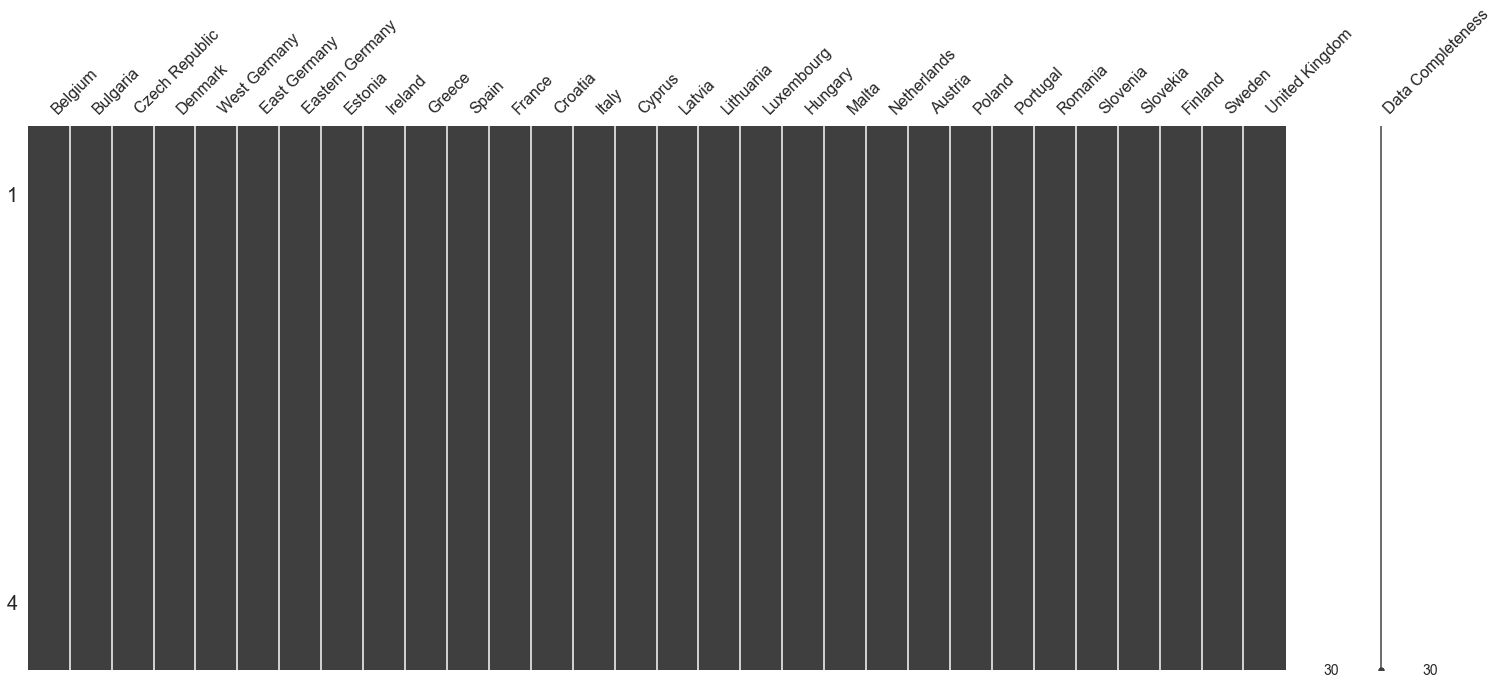

In [41]:
msno.matrix(Question_1, labels=True);

Fortunately, no missing columns. This analyses was run for all the dataframes of interest and had the same output; no missing data.
Next, the merging of the columns related to Germany

In [42]:
def merge_Germany(df):
    """Input: The dataframe object to be analysed
    Output: an unpivoted dataframe object with the columns "West Germany", "East Germany" and "Eastern Germany" 
    merged into one column "Germany"
    """
    
    df["Germany"]= df["West Germany"] + df["East Germany"] + df["Eastern Germany"]
    df = df.drop(["West Germany", "East Germany", "Eastern Germany"], axis = 1)
    df = df.reset_index()
    df= df.melt(id_vars = "Response", var_name = "Country", value_name = "Number")
    return df

In [43]:
Question_1 = merge_Germany(Question_1)
Question_1.head()

Response   Country Number
0          Yes   Belgium    320
1           No   Belgium    639
2      Refusal   Belgium      1
3  I dont know   Belgium      0
4          Yes  Bulgaria    348

Now to visualization of the data. Below is a function to plot a histogram of the responses

In [44]:
df = Question_1
title = " Have you taken any antibiotics orally such as tablets, powder or syrup in the last 12 months?"
def plot_hist(df, title):
    """Input:
    df- dataframe object for visualization
    title- the desired title of the histogram
    
    Output= A histogram plot of the responses
    """
    fig, ax =plt.subplots(figsize= (45,15), dpi = 100)
    sns.set_theme(style="darkgrid")
    ax = sns.barplot(x="Country", y="Number", hue="Response", data=df)
    ax.set_title(title, fontdict = {"fontsize":35})
    ax.set_xlabel("Country", fontsize = 35)
    ax.set_ylabel("Number", fontsize = 35)
    ax.tick_params( labelsize = 30, rotation = 90)
    ax.legend(loc= "best", bbox_to_anchor=(0.3, -0.3), fontsize = 30)
    ax.grid(linewidth= 4, which = "minor")
    return ax
   

    

(<AxesSubplot:title={'center':' Have you taken any antibiotics orally such as tablets, powder or syrup in the last 12 months?'}, xlabel='Country', ylabel='Number'>,)

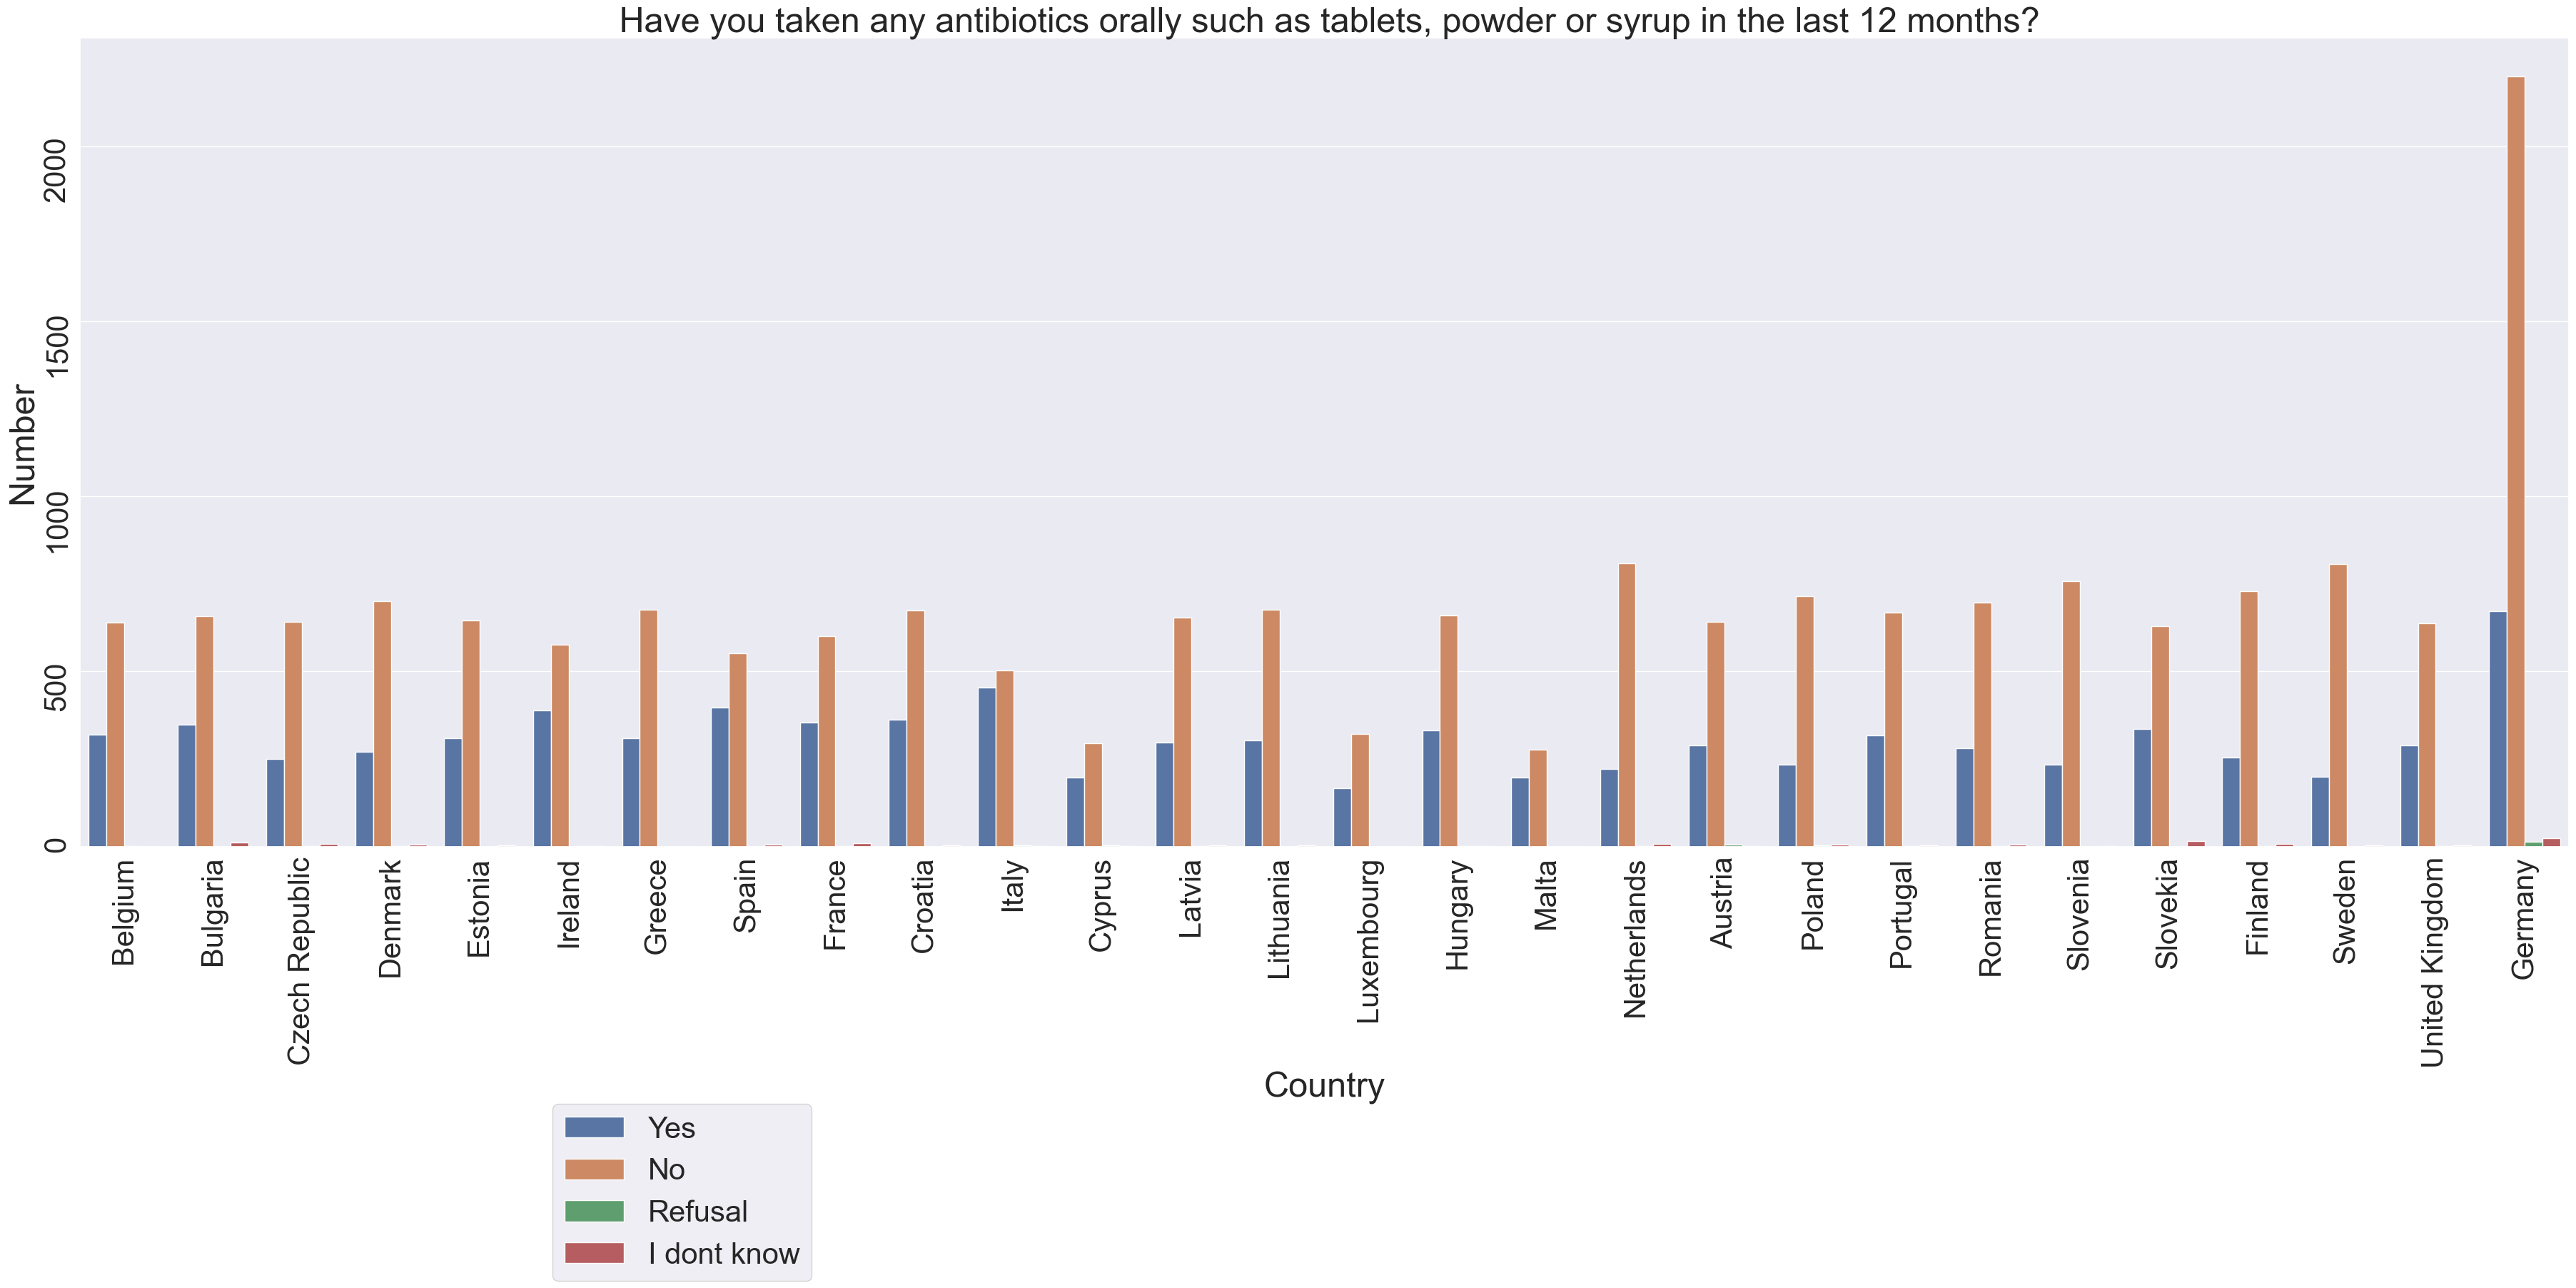

In [45]:
plot_hist(df, title );

From the chart above, the rate of antibiotics usage among the respondents is low as those who responded that they have not used antibiotics orally in the last 12 months of the data collection are higher than those who reported oral usage

# Question 2 (QC2): How did you obtain the last course of antibiotics that you used? 									


The second question addresses access to antibiotics. Normally, antibiotics should only be obtainable by medical prescription. This question should address that assumption.

<AxesSubplot:title={'center':'How did you obtain the last course of antibiotics used?'}, xlabel='Country', ylabel='Number'>

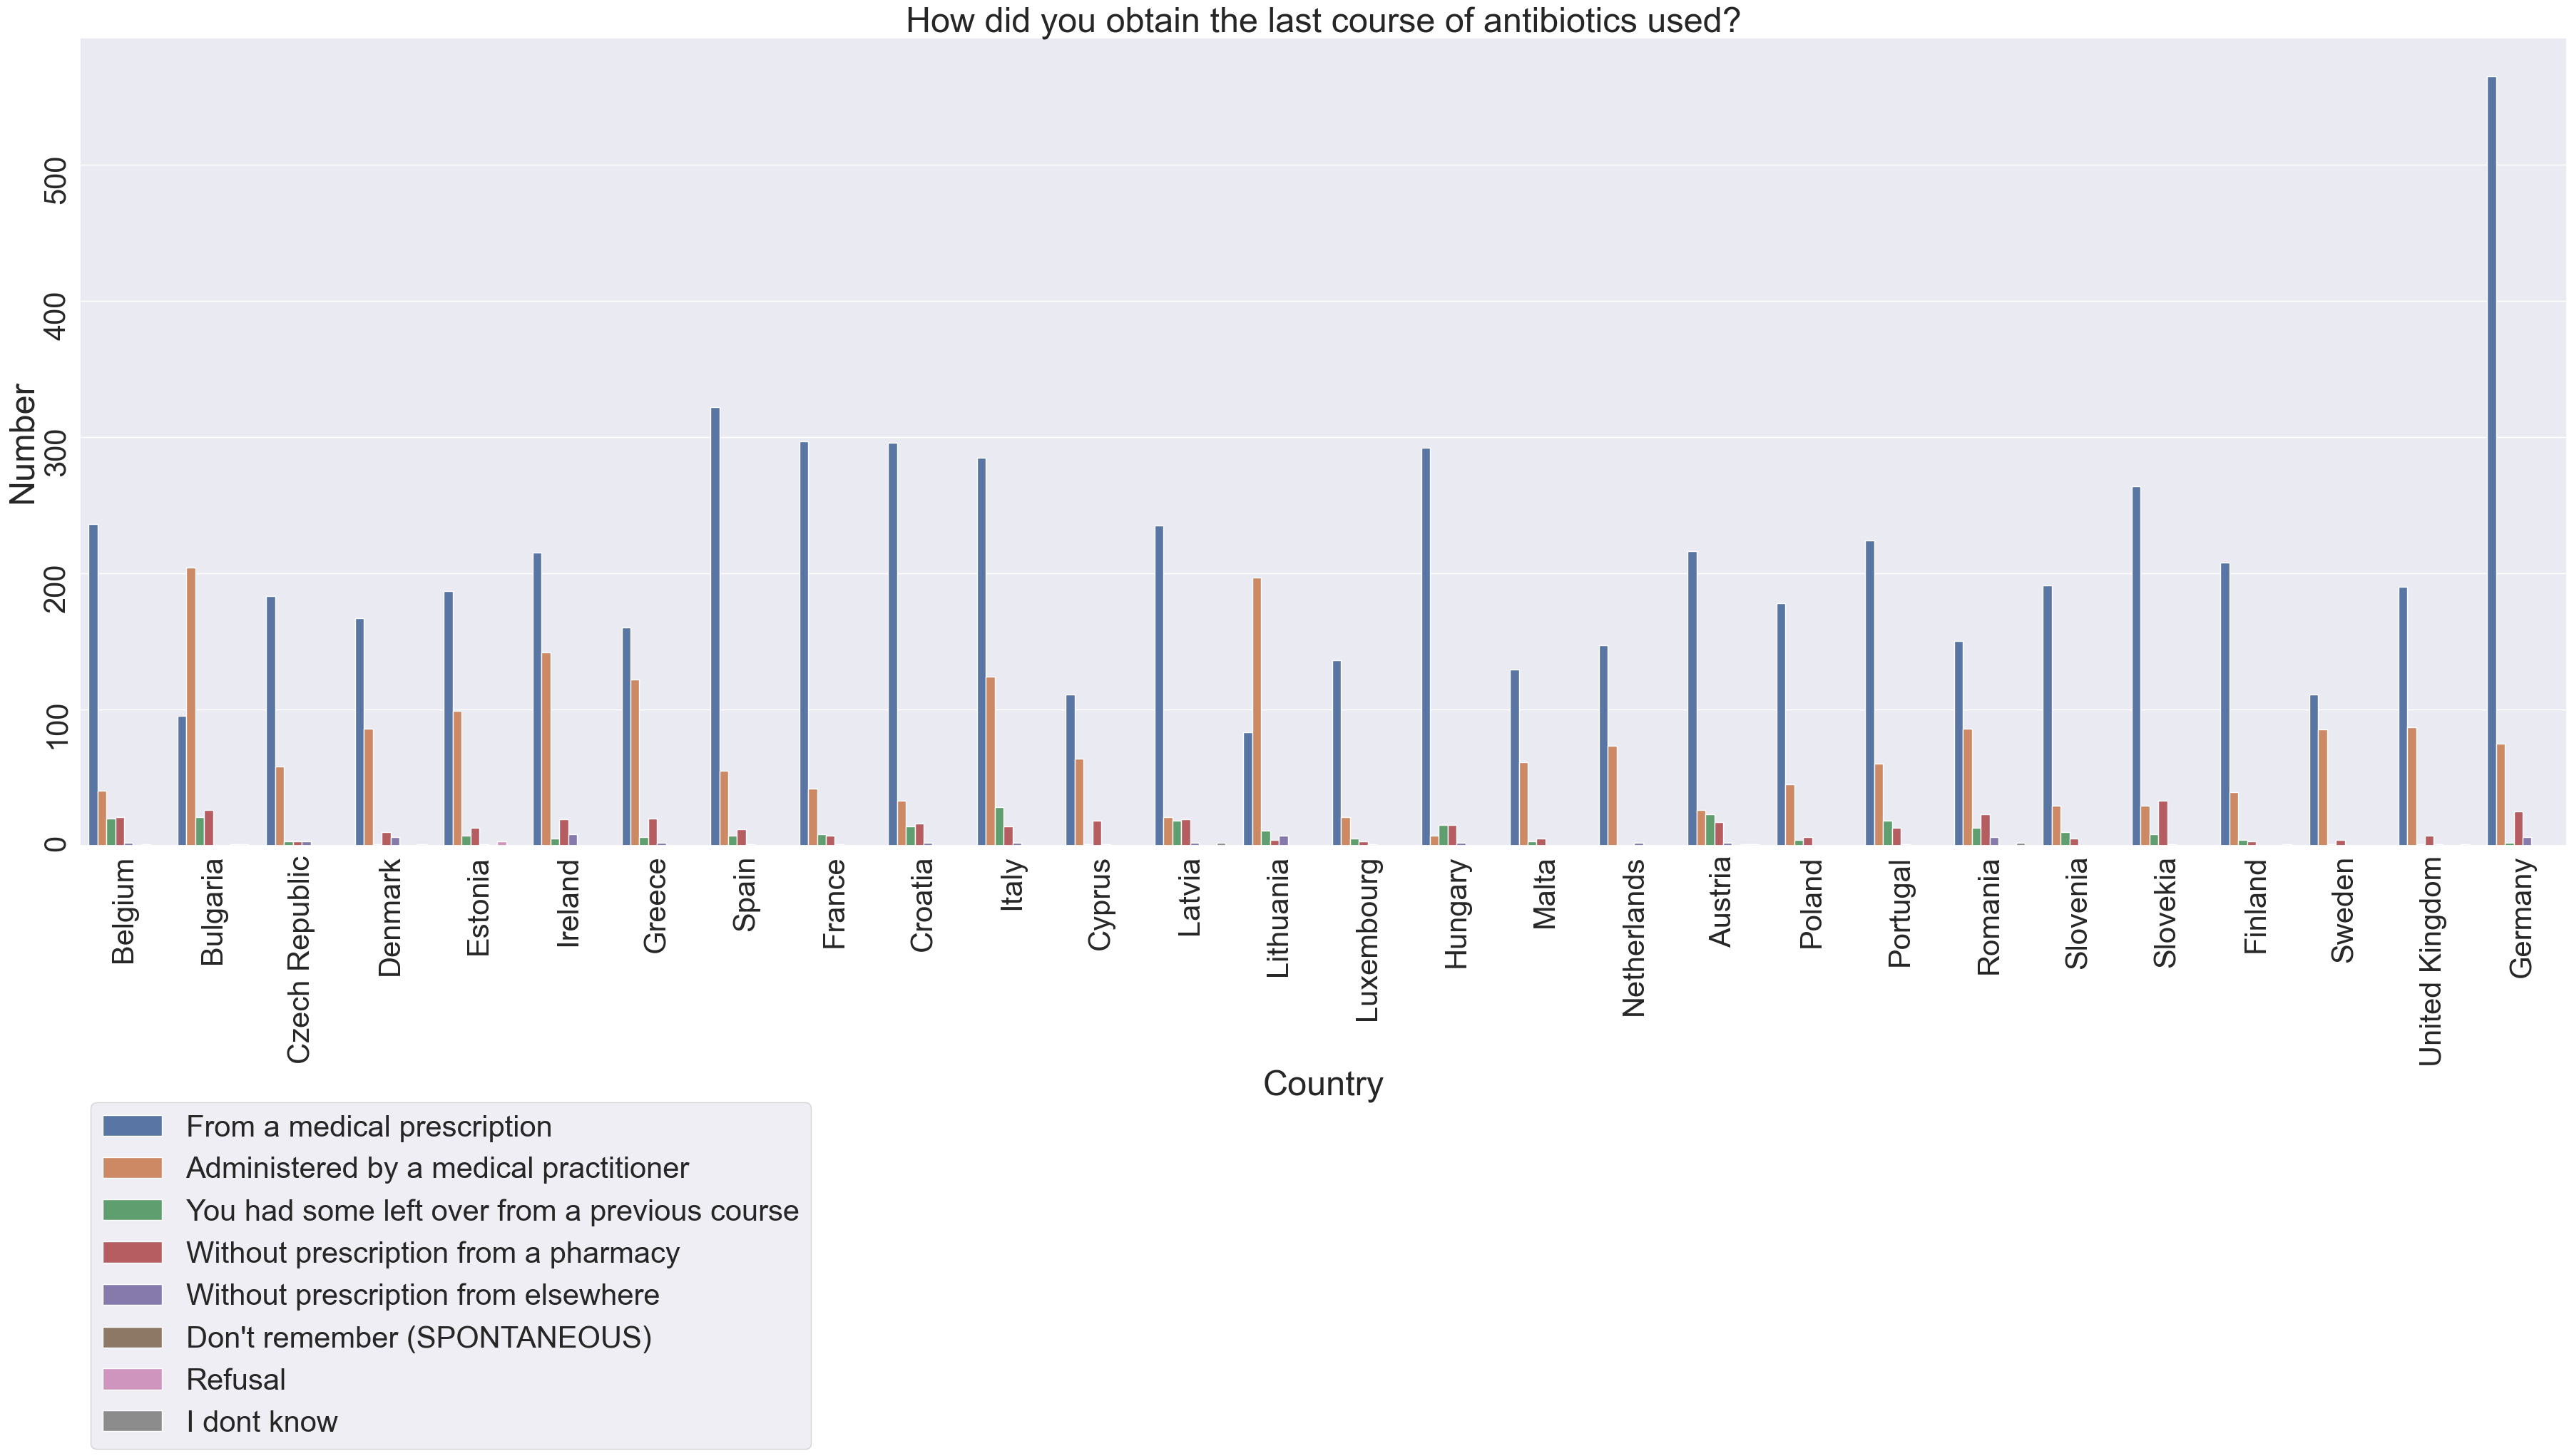

In [46]:

sheet_name= "QC2"
Question_2 = read_sheet(sheet_name)
Question_2 =Question_2.loc[["Sur prescription médicale", "Administré par une personne du corps médical", "Il vous en restait d’un précédent traitement",
"Sans prescription, dans une pharmacie", "Sans prescription, ailleurs", "Ne se souvient pas (SPONTANÉ)",
"Refus (SPONTANÉ)", "NSP"]]
Question_2= Question_2.rename(index= { "Sur prescription médicale":"From a medical prescription",
                                      "Administré par une personne du corps médical":"Administered by a medical practitioner",
                                      "Il vous en restait d’un précédent traitement":"You had some left over from a previous course",
                                      "Sans prescription, dans une pharmacie":"Without prescription from a pharmacy",
                                      "Sans prescription, ailleurs":"Without prescription from elsewhere",
                                     "Ne se souvient pas (SPONTANÉ)":"Don't remember (SPONTANEOUS)", "Refus (SPONTANÉ)": "Refusal", "NSP": "I dont know",
                                                })
Question_2=merge_Germany(Question_2)
plot_hist(Question_2, "How did you obtain the last course of antibiotics used?");



Majority of the respondents said they obtained their last antibiotics course from a medical prescription or by a medical practitioner. It is however visible that a considerable number of respondents admitted to obtaining antibiotics from a pharmacy without prescription, also, some admitted to using leftover from a previous course; both habits are said to lead to antibiotics abuse. 

From the data, Slovakia and Bulgaria appear to be the countries in the region where access to antibiotics without prescription is relatively prevalent

# QC3: What was the reason for last taking the antibiotics that you used? (MULTIPLE ANSWERS POSSIBLE)									


Question 3 addresses the reason for the last course of antibiotics. This should give an idea of the most prevalent reasons for antibiotics use in the region

<AxesSubplot:title={'center':'What was the reason for last taking the antibiotics that you used'}, xlabel='Country', ylabel='Number'>

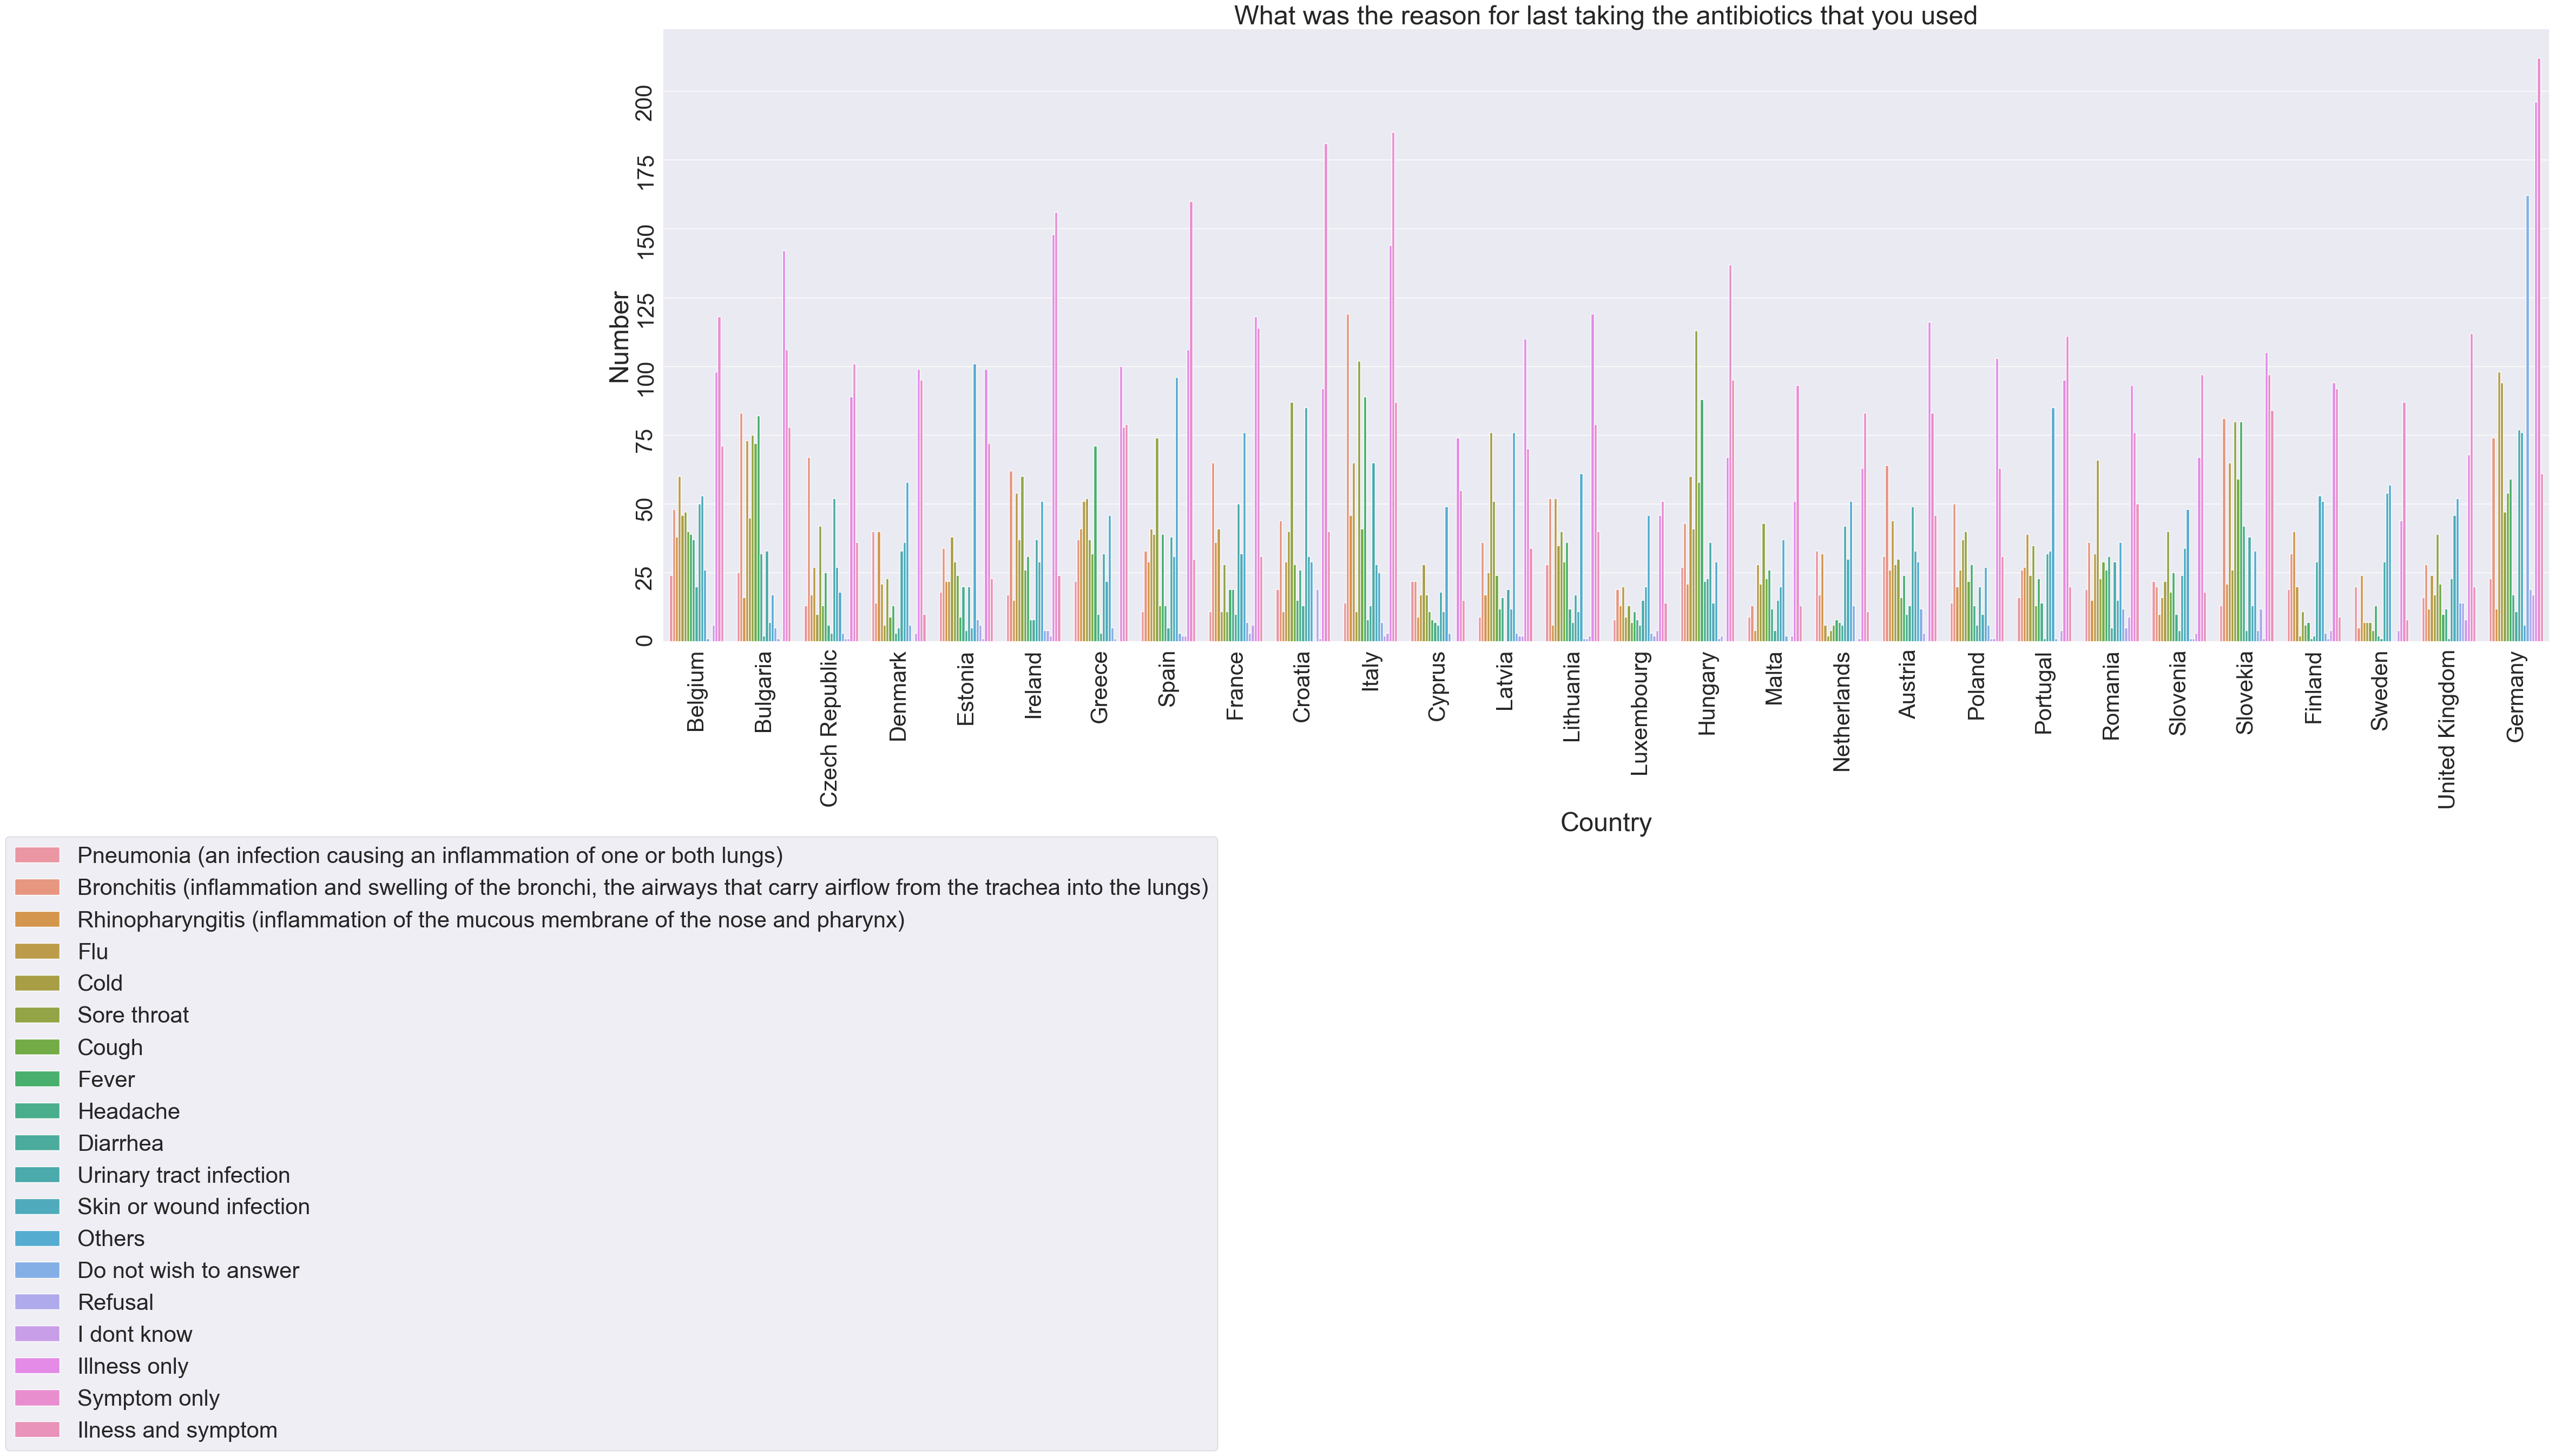

In [47]:
sheet_name = "QC3"
Question_3 = read_sheet(sheet_name)
Question_3 =Question_3.loc[["Une pneumonie (une infection qui cause une inflammation d’un ou des deux poumons)", 
                            "Une bronchite (une inflammation et un encombrement des bronches, les voies respiratoires qui acheminent le flux d’air de la trachée dans les poumons)", 
                            "Une rhinopharyngite (une inflammation de la muqueuse du nez et du pharynx)", 
                            "La grippe", "Un rhume", "Un mal de gorge", "De la toux", "De la fièvre", "Un mal de tête",
                            "De la diarrhée", "Une infection urinaire", "Une infection de la peau ou d’une blessure",
                            "Autre (SPONTANÉ)", "Ne souhaite pas répondre (SPONTANÉ)", "Refus (SPONTANÉ) (N)", "NSP",
                            "Maladie seulement", "Symptôme seulement", "Maladie et symptôme"
                           ]]
Question_3= Question_3.rename(index= {"Une pneumonie (une infection qui cause une inflammation d’un ou des deux poumons)": "Pneumonia (an infection causing an inflammation of one or both lungs)", 
                            "Une bronchite (une inflammation et un encombrement des bronches, les voies respiratoires qui acheminent le flux d’air de la trachée dans les poumons)":"Bronchitis (inflammation and swelling of the bronchi, the airways that carry airflow from the trachea into the lungs)", 
                            "Une rhinopharyngite (une inflammation de la muqueuse du nez et du pharynx)": "Rhinopharyngitis (inflammation of the mucous membrane of the nose and pharynx)", 
                            "La grippe": "Flu", "Un rhume":"Cold", "Un mal de gorge":"Sore throat", "De la toux":"Cough", "De la fièvre":"Fever", 
                            "Un mal de tête":"Headache", "De la diarrhée": "Diarrhea", "Une infection urinaire":"Urinary tract infection",
                            "Une infection de la peau ou d’une blessure":"Skin or wound infection", "Autre (SPONTANÉ)": "Others",
                            "Ne souhaite pas répondre (SPONTANÉ)": "Do not wish to answer", "Refus (SPONTANÉ) (N)":"Refusal", "NSP":"I dont know",
                            "Maladie seulement":"Illness only", "Symptôme seulement":"Symptom only", "Maladie et symptôme":"Ilness and symptom"})
Question_3 = merge_Germany(Question_3)
plot_hist(Question_3, "What was the reason for last taking the antibiotics that you used" );

While this particular data visualization leaves a lot to be desired, it is evident that most persons used antibiotics for illness and symptom. The number of answers possible makes this a bit challenging to clearly differentiate which bar belongs to which exact answer

# QC4: Did you have a test, for example a blood or urine test, or throat swab, to find out what was causing your illness, before or at the same time as you started antibiotics ? 									


One of the methods for fighting antibiotics abuse and thus resistance is  testing before antibiotics administration. This testing normally includes both pathogen identification and antibiotics susceptibility testing, these tests ensure only antibiotics that the pathogen is susceptible to are administered.

The fourth question addresses if tests were conducted before, or alongside antibiotics administration.

<AxesSubplot:title={'center':'Did you have a test before or at the time of antibiotics administration?'}, xlabel='Country', ylabel='Number'>

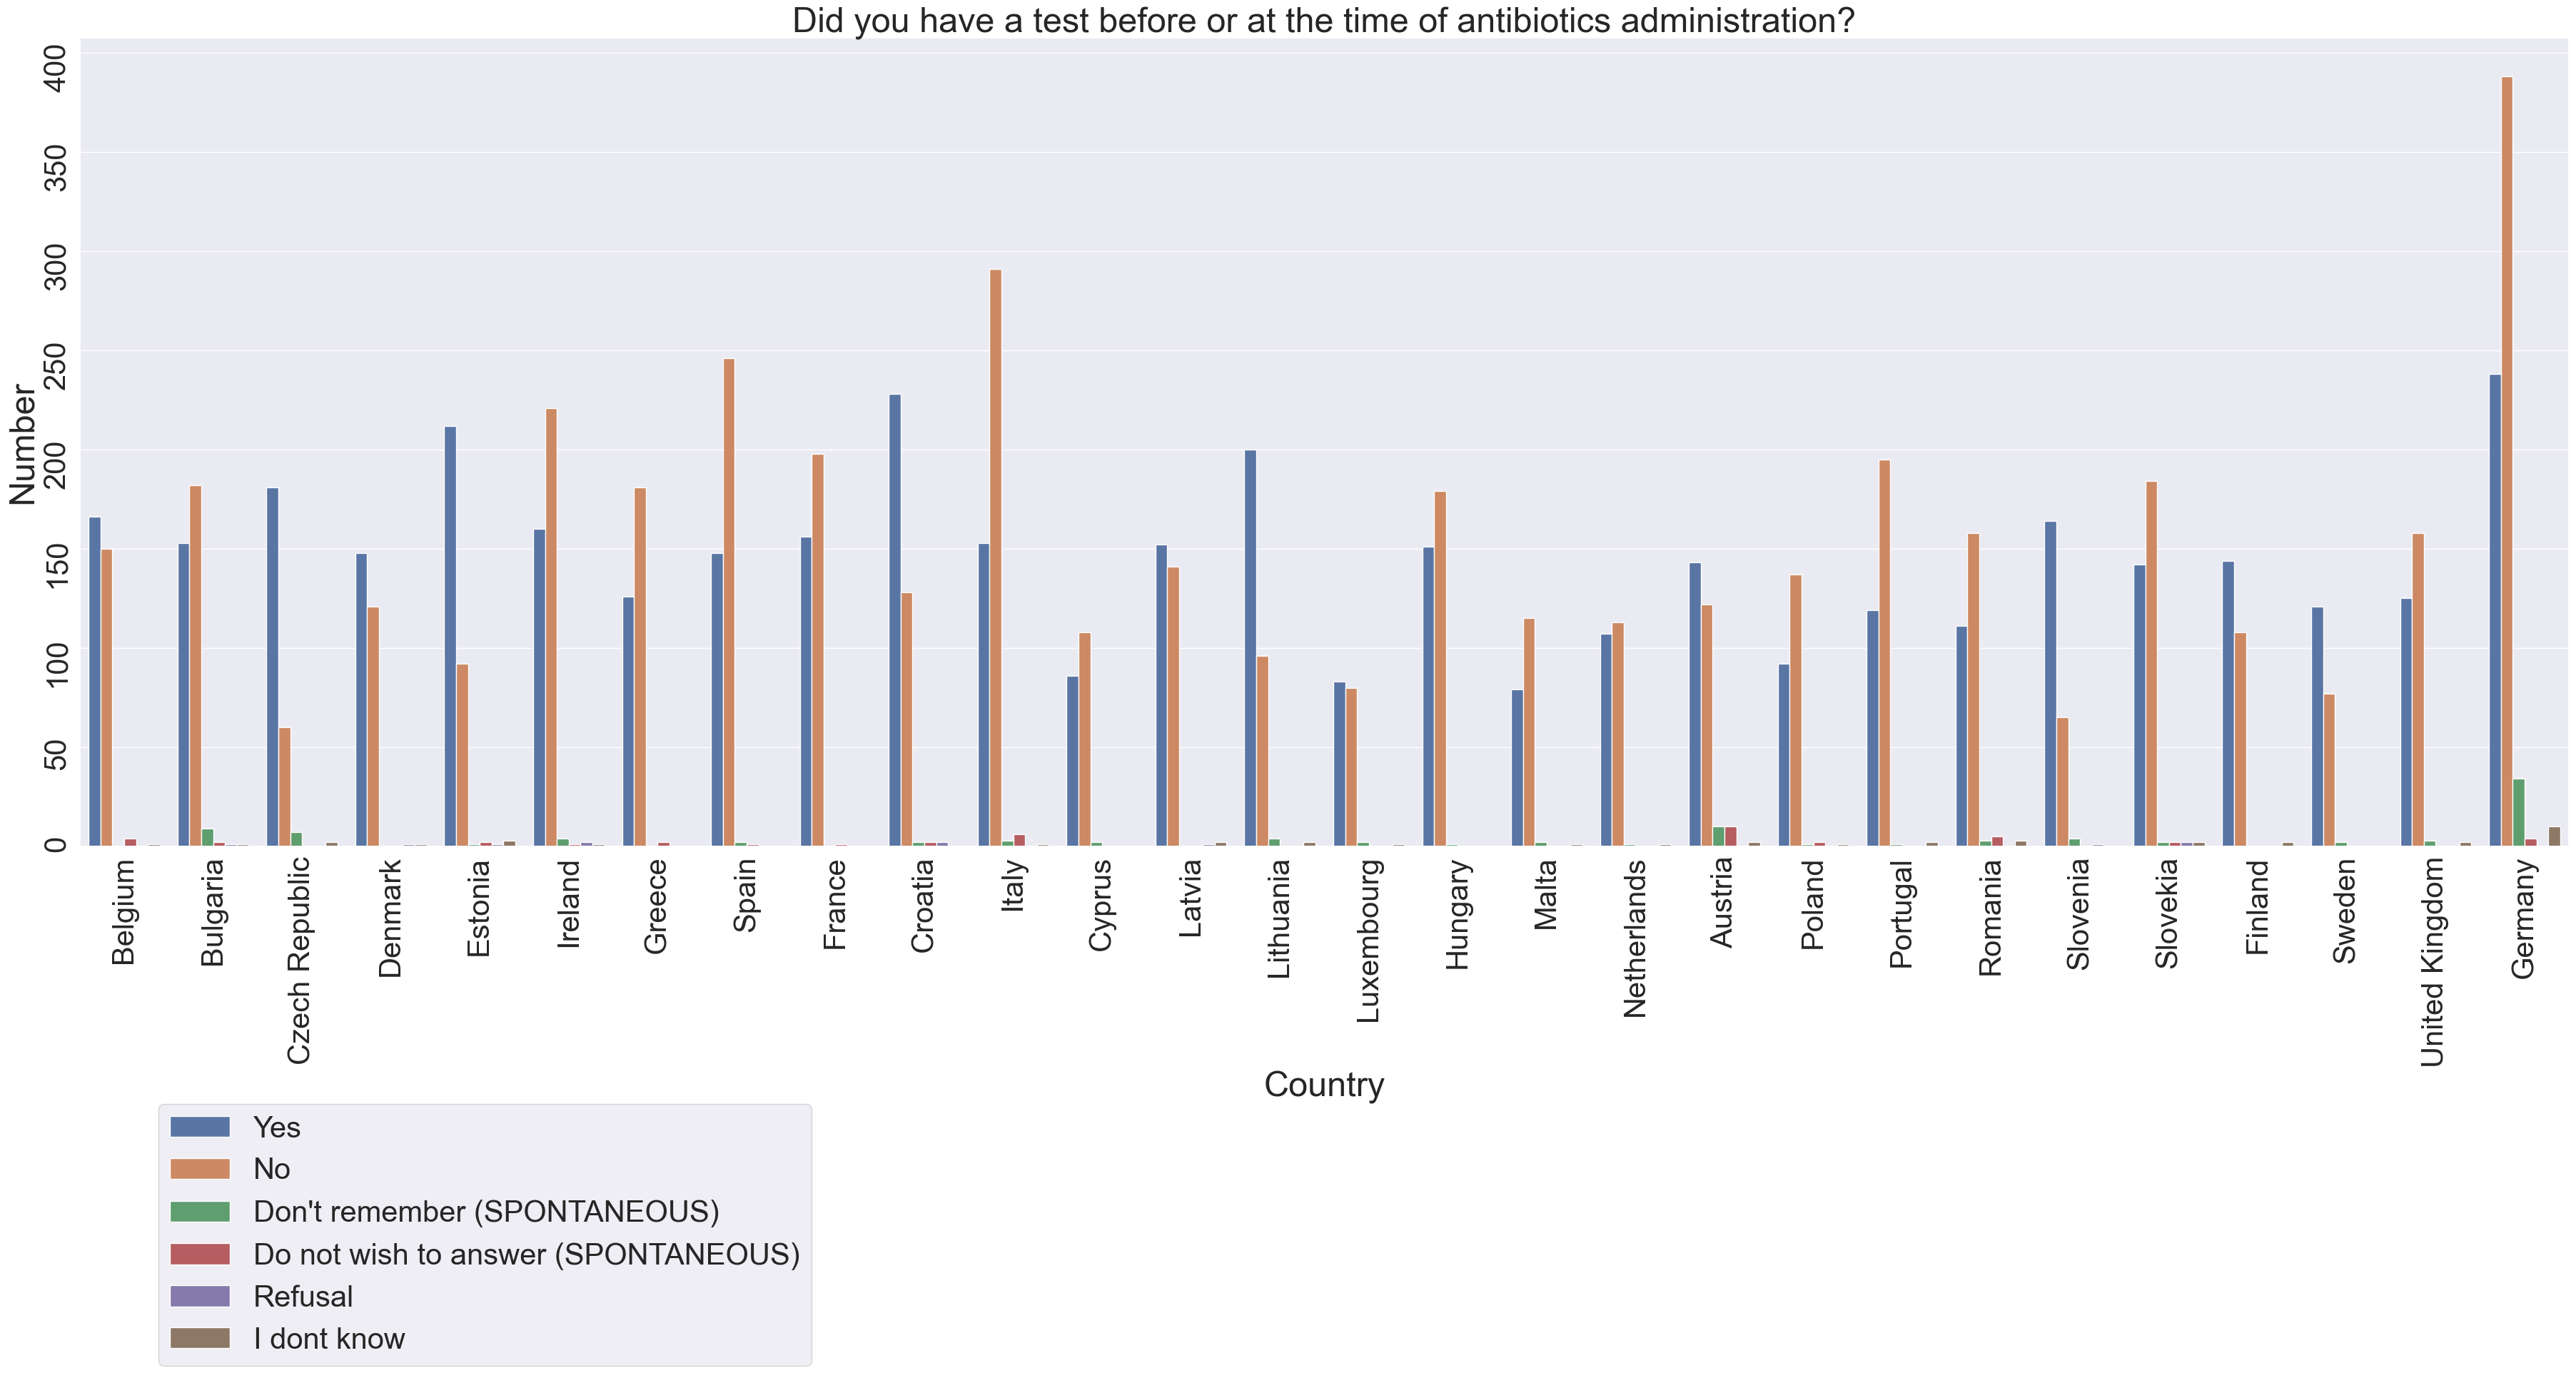

In [50]:
sheet_name= "QC4"
Question_4 = read_sheet(sheet_name)
Question_4 =Question_4.loc[[ "Oui", "Non", "Ne se souvient pas (SPONTANÉ)", 
                            "Ne souhaite pas répondre (SPONTANÉ)", "Refus (SPONTANÉ)", "NSP"]]
Question_4= Question_4.rename(index= {"Oui":"Yes", "Non":"No", "Ne se souvient pas (SPONTANÉ)":"Don't remember (SPONTANEOUS)", 
                                     "Ne souhaite pas répondre (SPONTANÉ)":"Do not wish to answer (SPONTANEOUS)",
                                      "Refus (SPONTANÉ)": "Refusal", "NSP": "I dont know"})
Question_4 = merge_Germany(Question_4)
plot_hist(Question_4, "Did you have a test before or at the time of antibiotics administration?");


Most respondents admitted to no testing before antibiotics administration.
Belgium, Czech Republic, Denmark, Estonia, Croatia, Latvia, Lithuania, Luxembourg, Austria, Slovenia, Finland and Sweden (12 out of the 28 countries) are the ones with majority of respondents saying they took tests before antibiotics administration. 
This is an issue that should be on concern to the EU in its fight against antibiotics resistance. The "No" responses are shockingly high

# For each of the following statements, please tell me whether you think it is true or false. QC5.1: Antibiotics kill viruses									
								


Questions 5.1, 5.2 and 5.3 are testing the knowledge of the respondents on what may amount to misuse of antibiotics

<AxesSubplot:title={'center':'Antibiotics kill viruses?'}, xlabel='Country', ylabel='Number'>

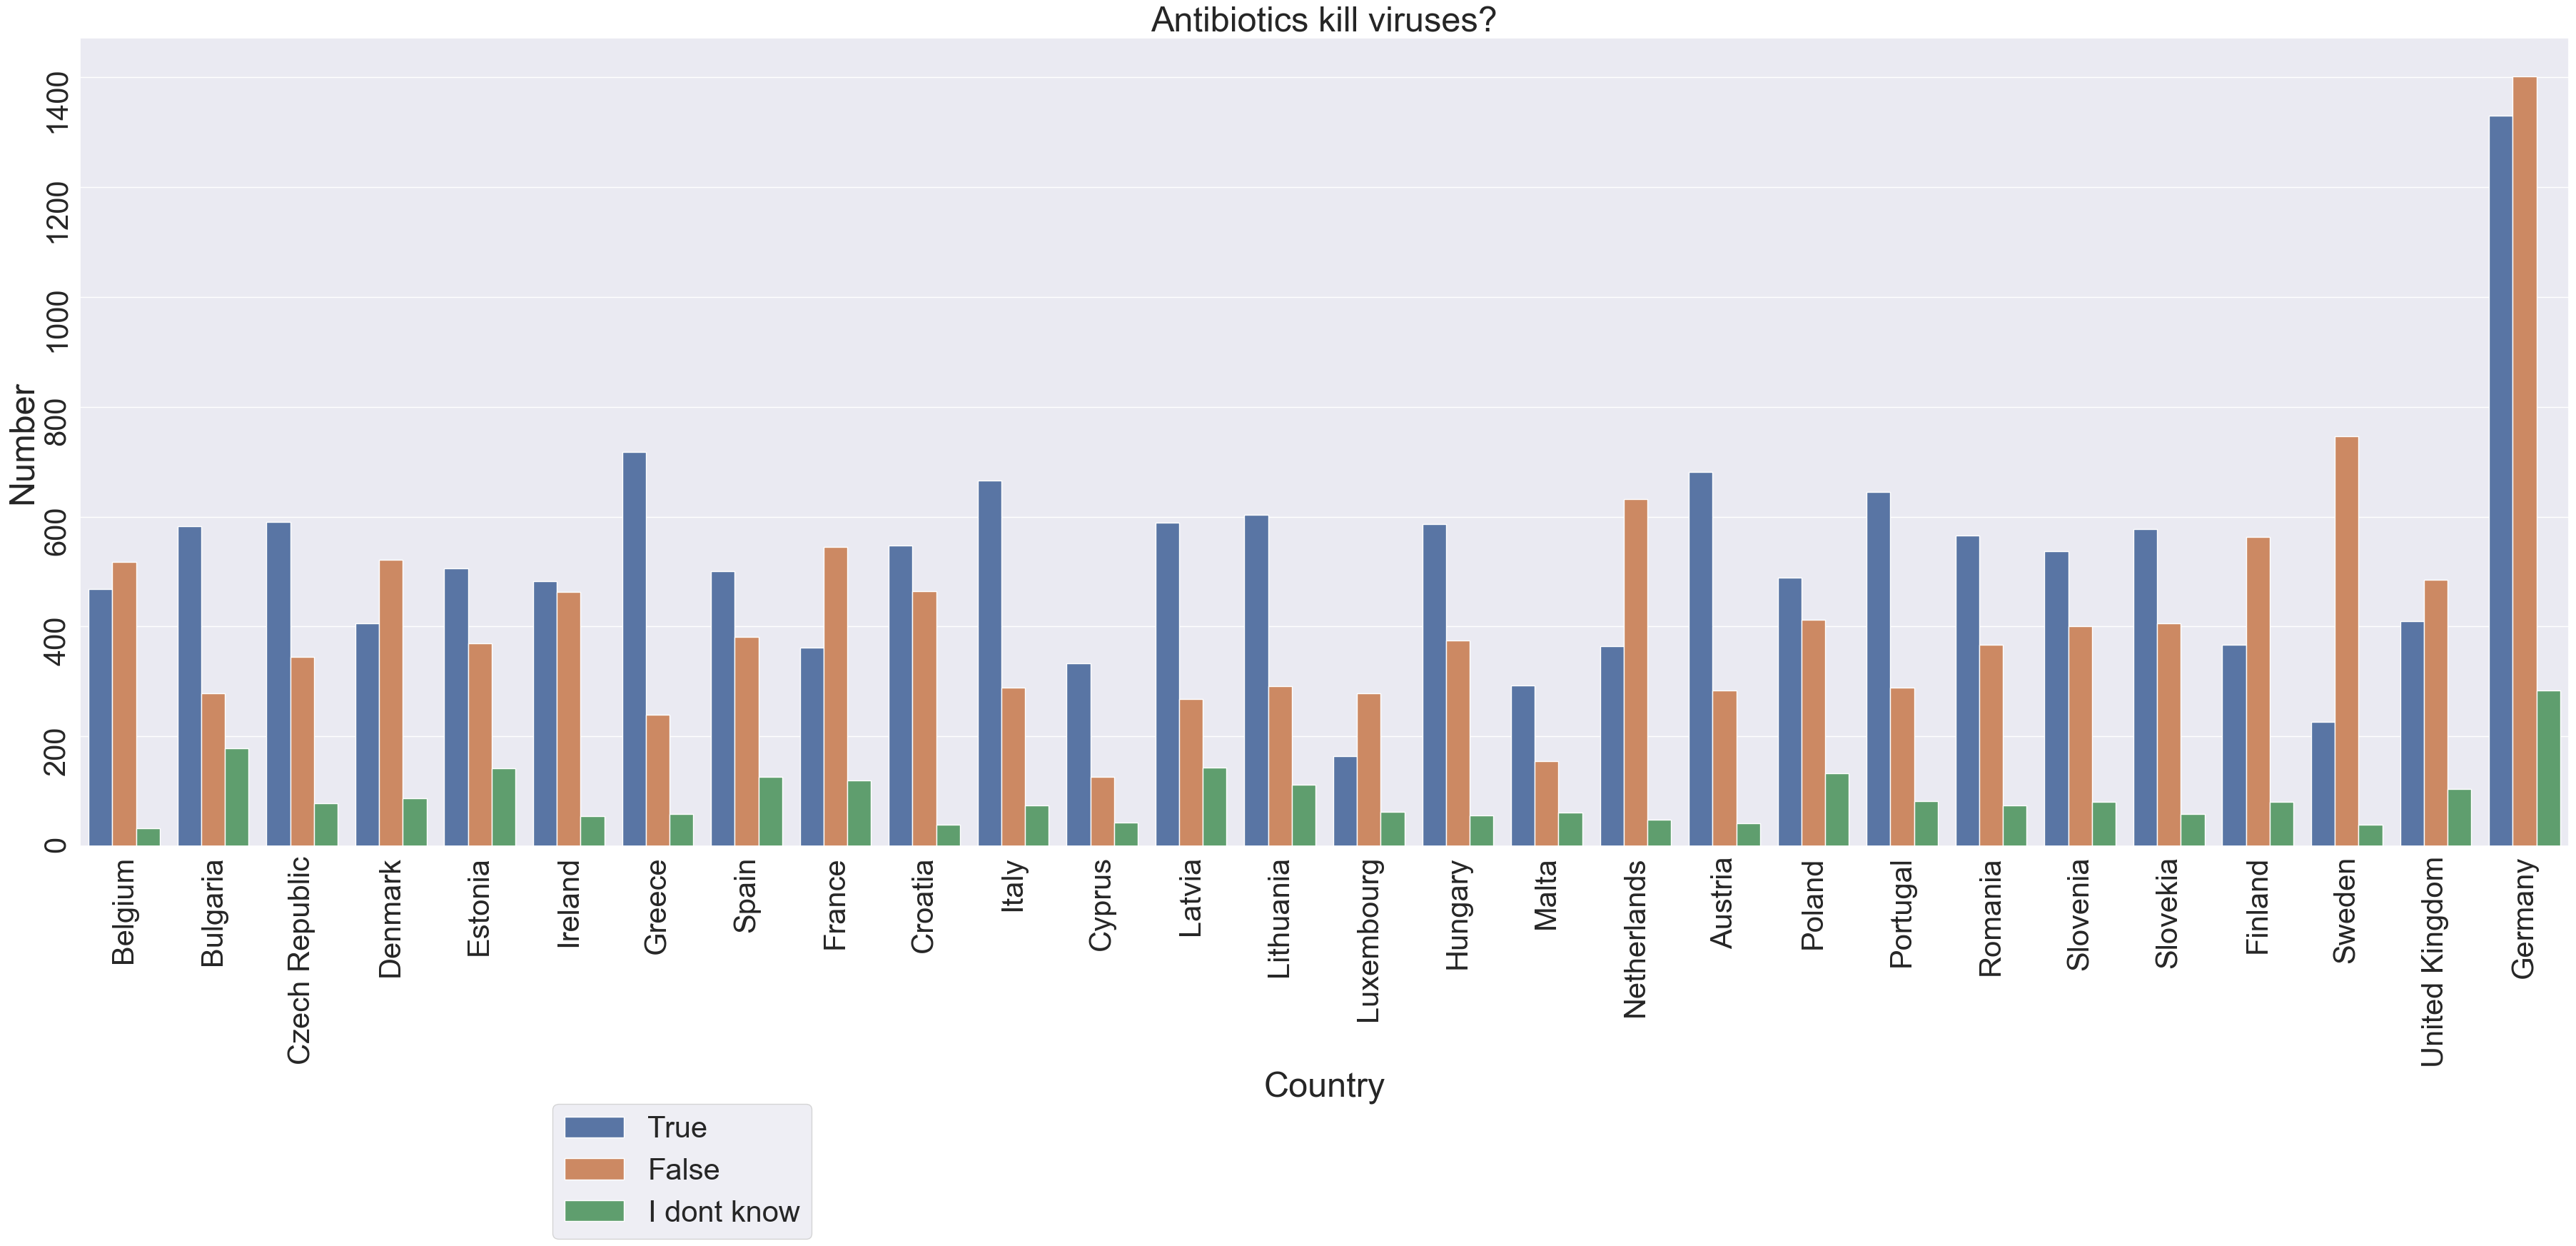

In [51]:
sheet_name = "QC5.1"
Question_5_1 = read_sheet(sheet_name)
Question_5_1 =Question_5_1.loc[["Vraie", "Fausse", "NSP"]]
Question_5_1= Question_5_1.rename(index= {"Vraie":"True", "Fausse":"False", "NSP":"I dont know"})
Question_5_1 = merge_Germany(Question_5_1)
plot_hist(Question_5_1, "Antibiotics kill viruses" );



Those who said  its true that antibiotics kill viruses are in the majority, when you add their number to those that admitted to not knowing the answer, the relative number gives an indication that more information is needed regarding antibiotics in relation to viruses.
Antibiotics are ineffective against viruses

# QC5.2: Antibiotics are effective against colds

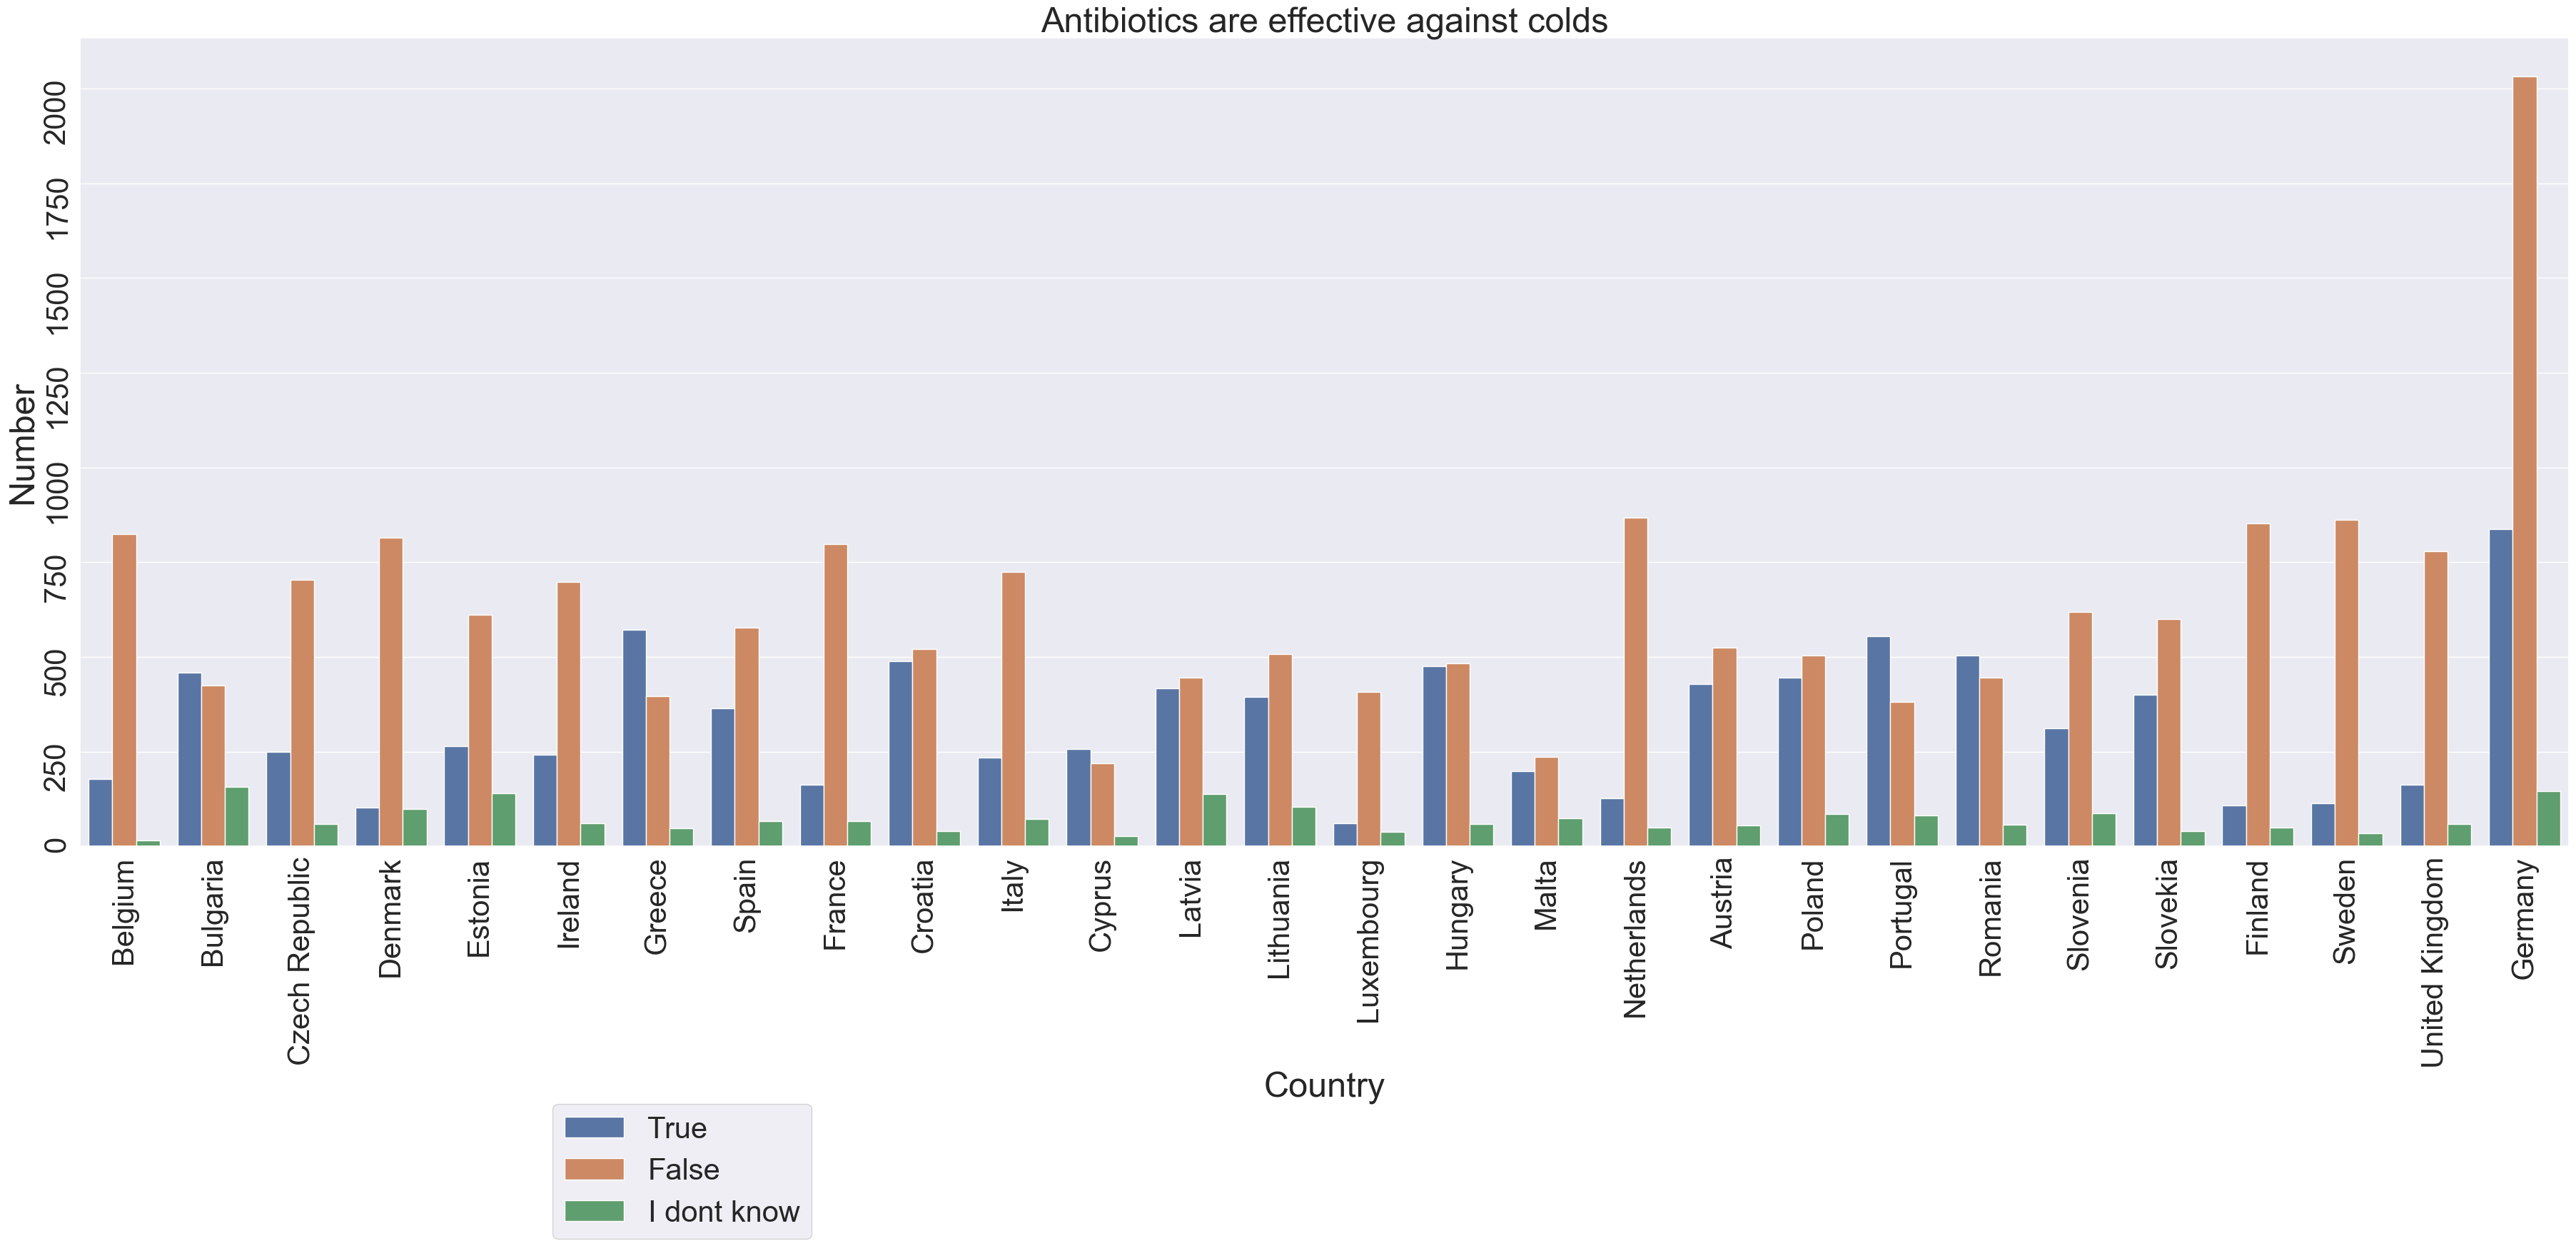

In [53]:
sheet_name= "QC5.2"
Question_5_2 = read_sheet(sheet_name)
Question_5_2 =Question_5_2.loc[[ "Vraie", "Fausse", "NSP"]]
Question_5_2= Question_5_2.rename(index= {"Vraie":"True", "Fausse":"False", "NSP":"I dont know"})
Question_5_2 = merge_Germany(Question_5_2)
plot_hist(Question_5_2, "Antibiotics are effective against colds" );


Majority of the respondents know that antibiotics are ineffective against colds

# QC5.3: Unnecessary use of antibiotics makes them become ineffective

<AxesSubplot:title={'center':'Unnecessary use of antibiotics makes them become inneffective'}, xlabel='Country', ylabel='Number'>

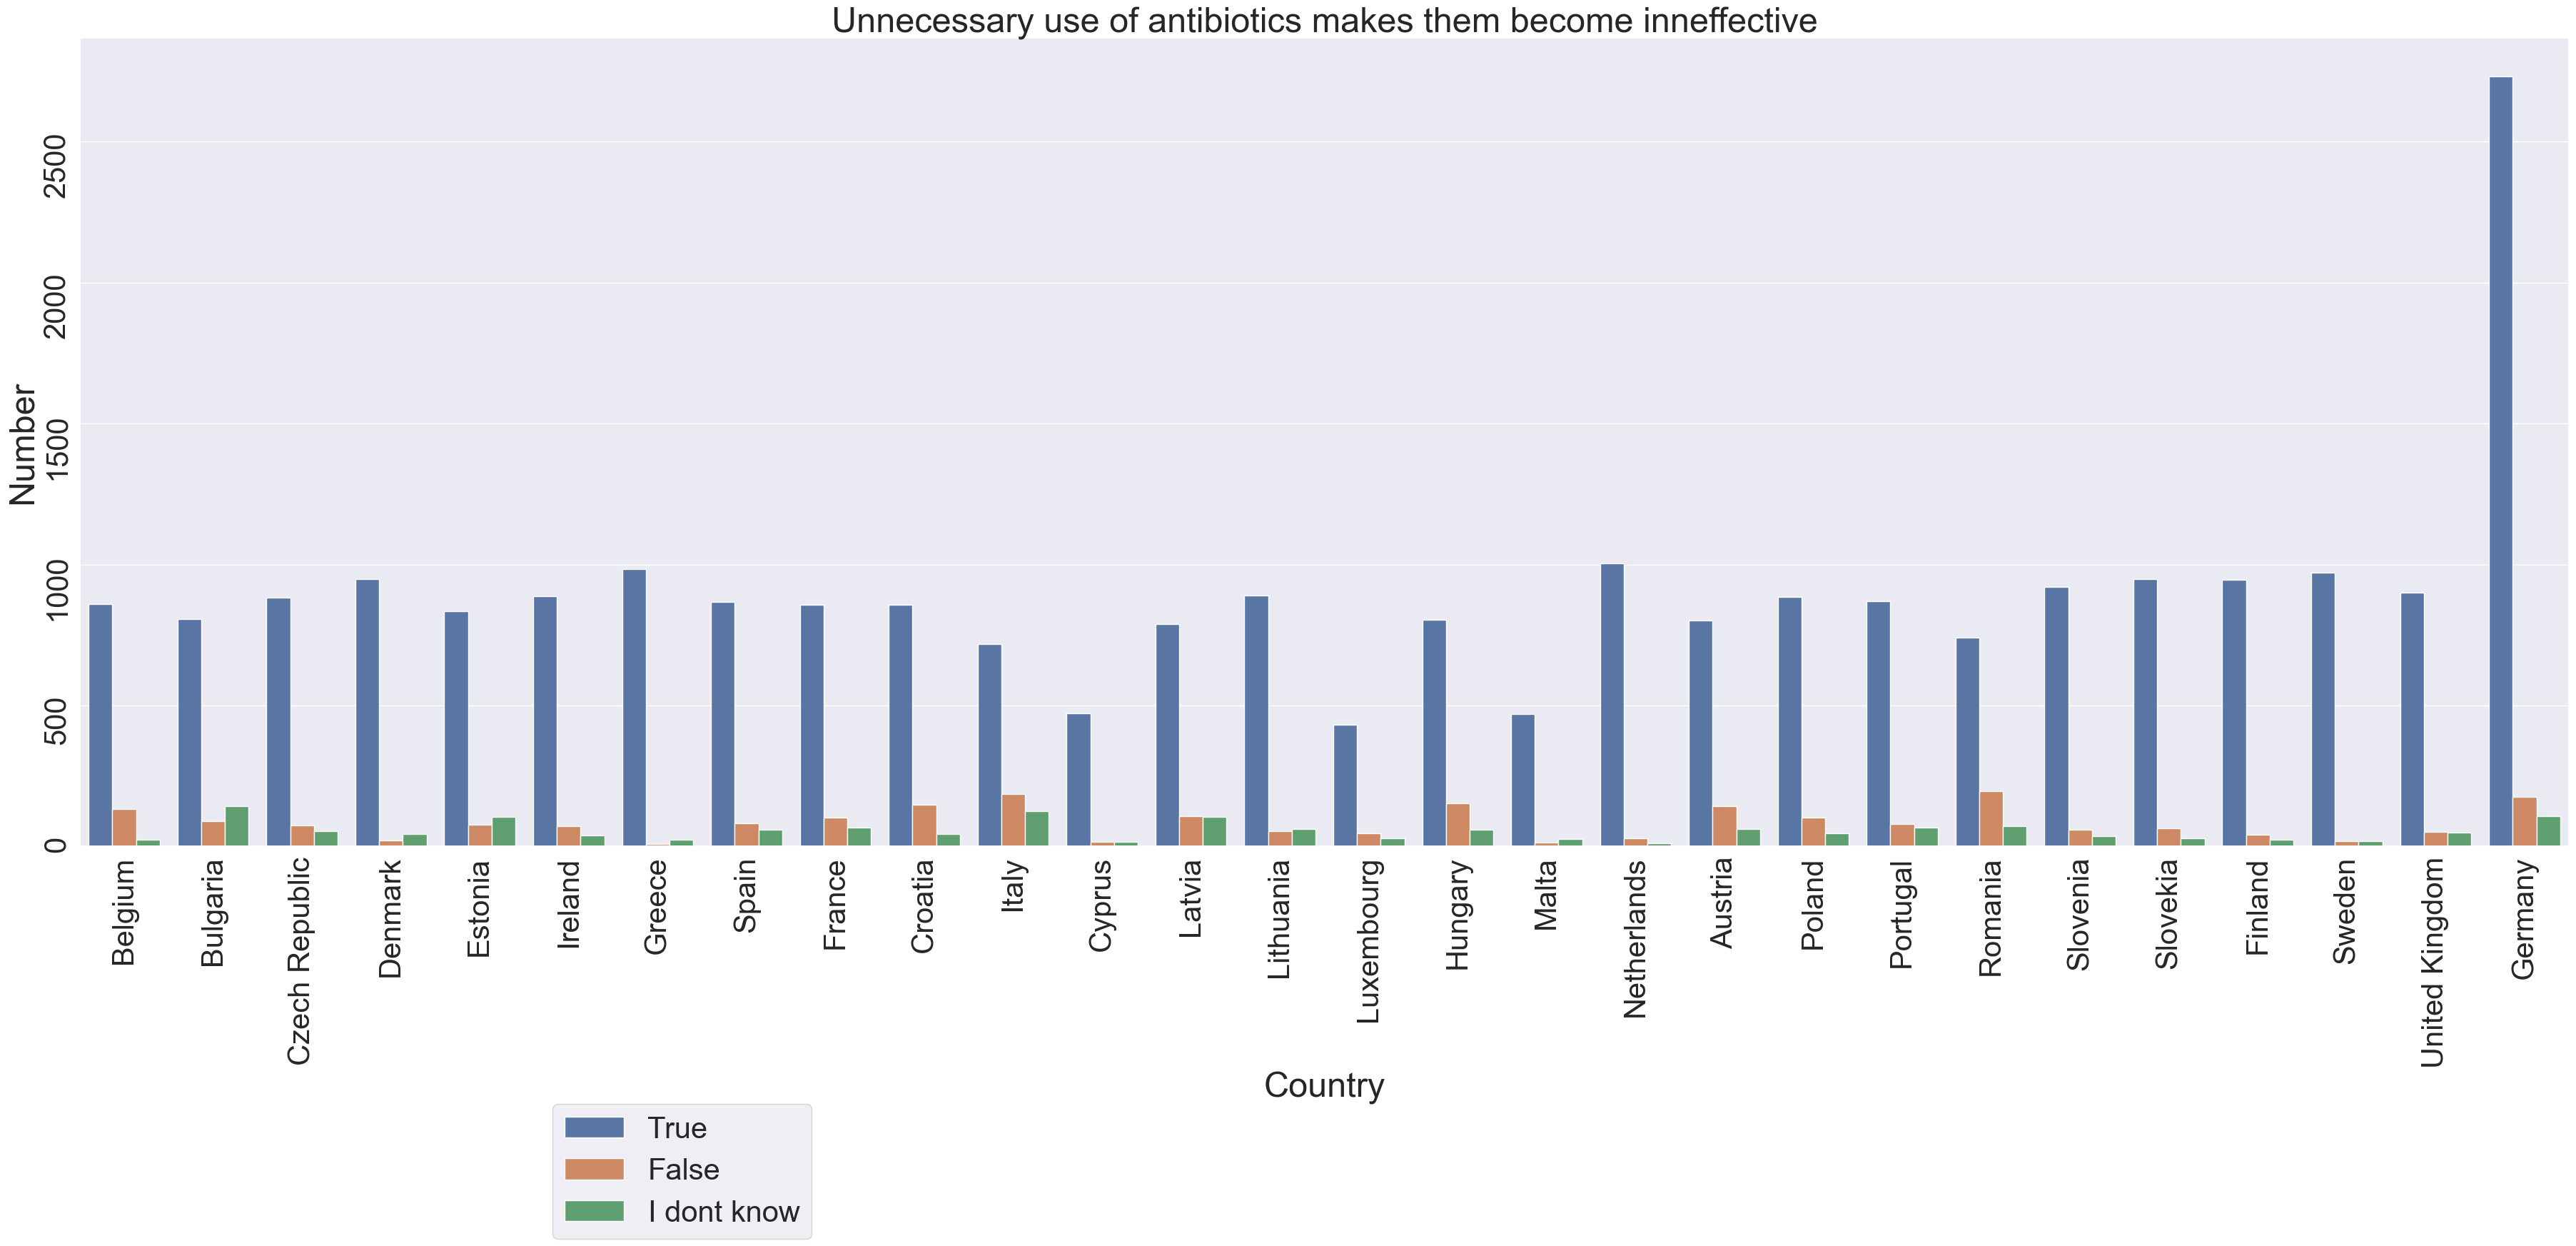

In [54]:
sheet_name= "QC5.3"
Question_5_3 = read_sheet(sheet_name)
Question_5_3 =Question_5_3.loc[[ "Vraie", "Fausse", "NSP"]]
Question_5_3= Question_5_3.rename(index= {"Vraie":"True", "Fausse":"False", "NSP":"I dont know"})
Question_5_3 = merge_Germany(Question_5_3)
plot_hist(Question_5_3, "Unnecessary use of antibiotics makes them become inneffective");

Clearly, the majority of the respondents know that unnecessary use of antibiotics makes them ineffective. The challenge now is in knowing when usage can be termed unnecessary

# QC6 When do you think you should stop taking antibiotics once you have begun a course of treatment?

Question 6 addresses an important issue in antibiotics usage. Doctors recommend that patients stop antibiotics usage when the recommended course is completed, not when the patient feels better

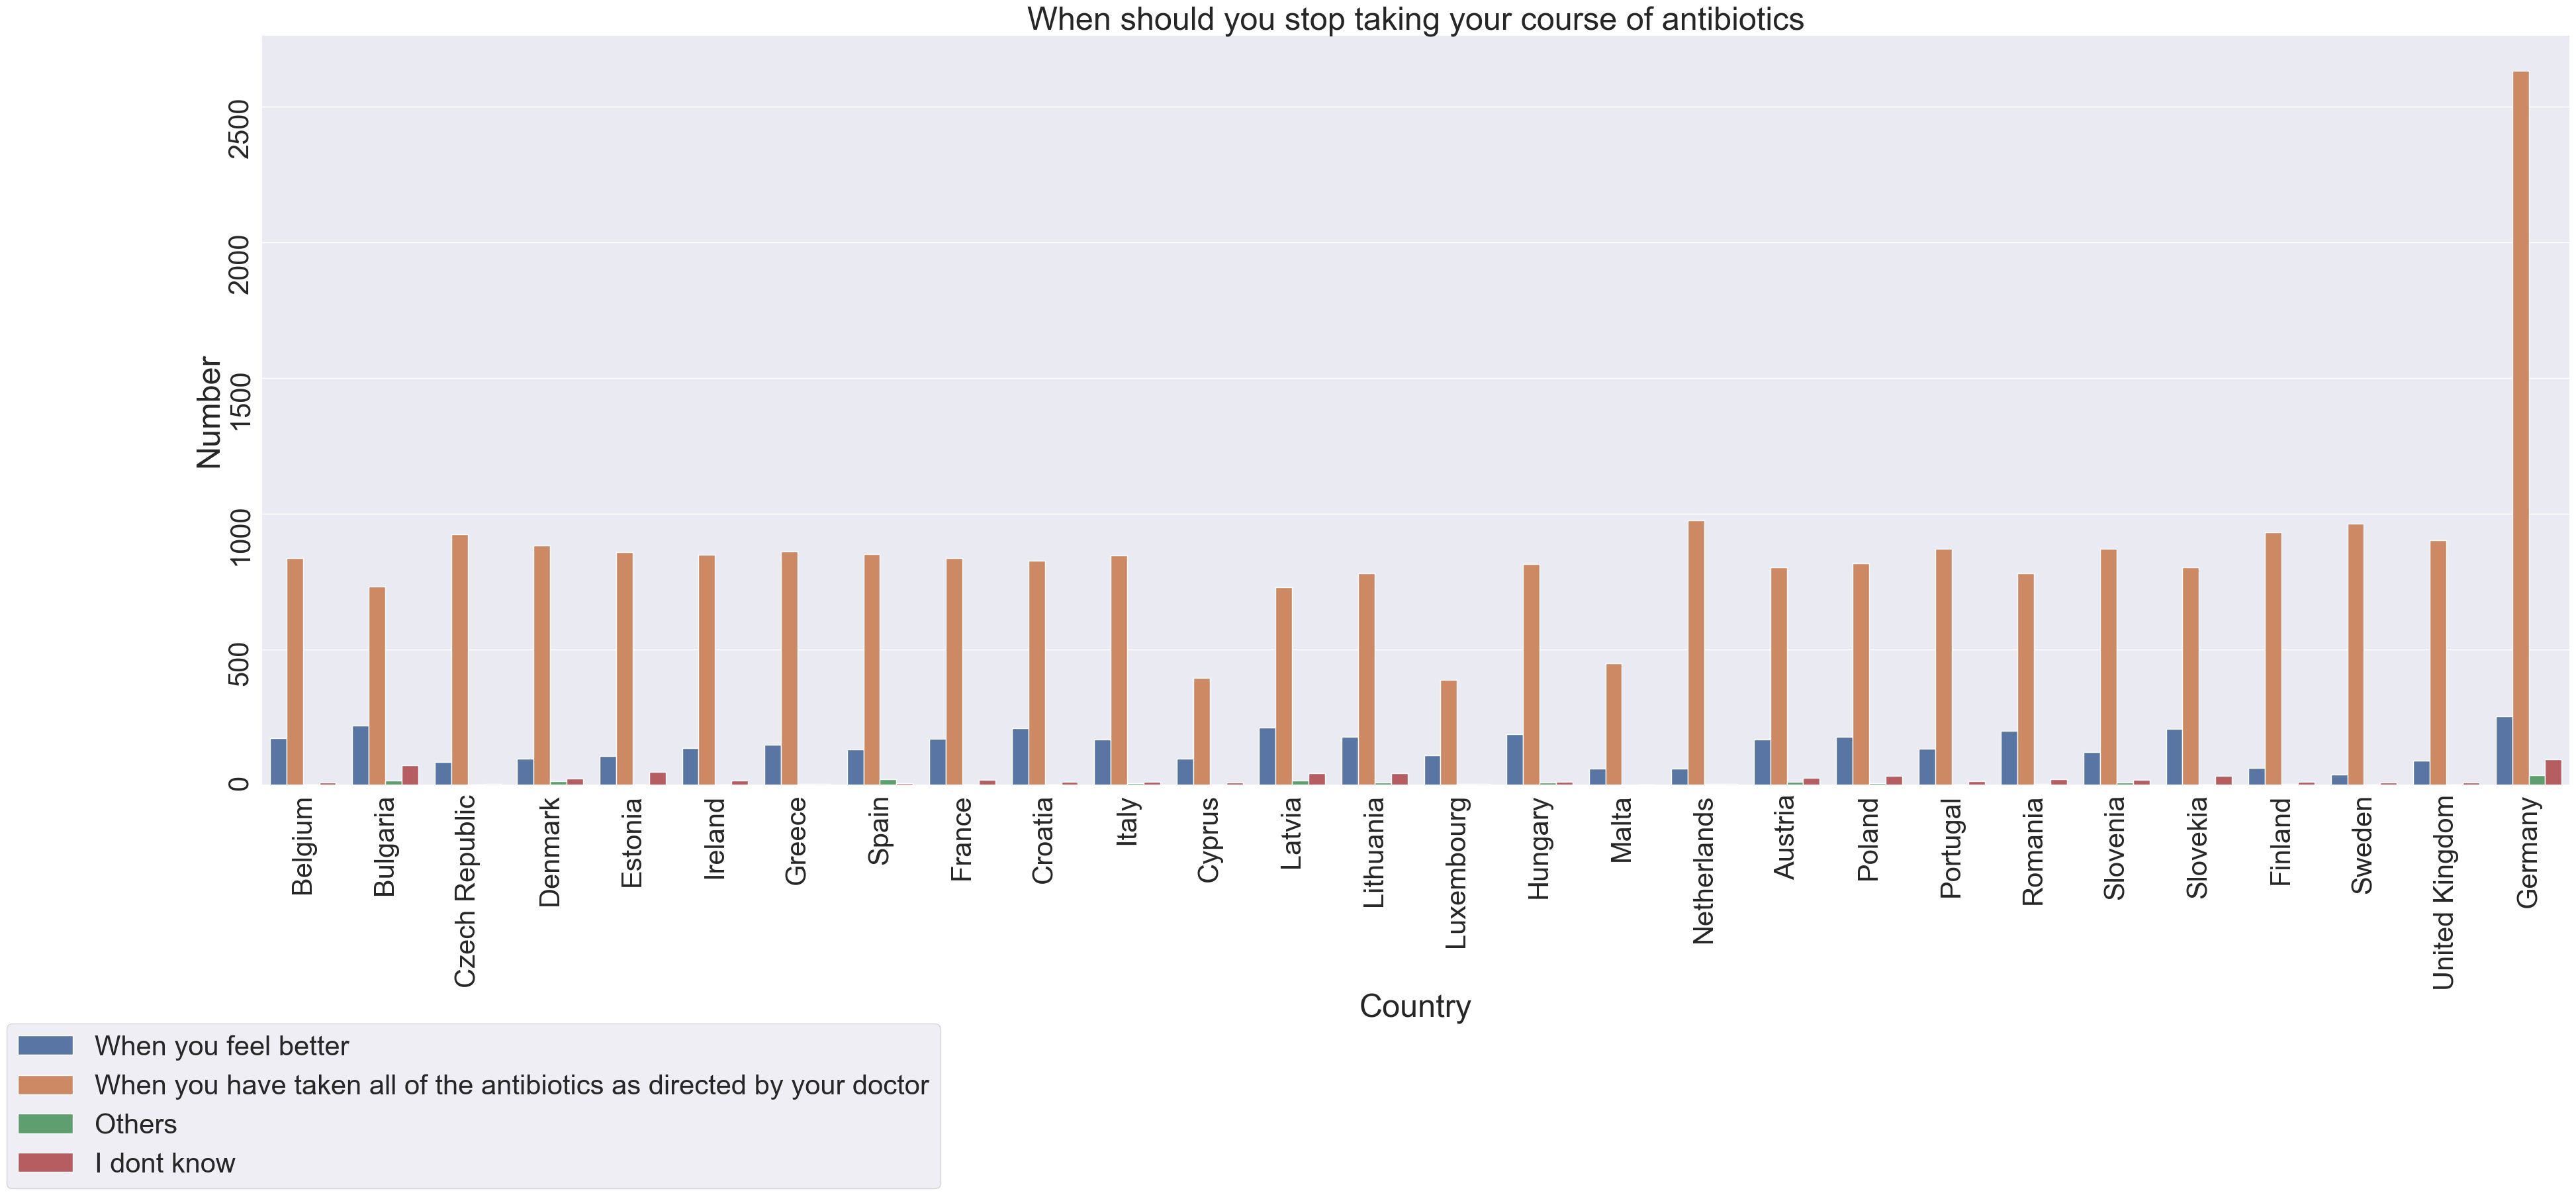

In [55]:
sheet_name = "QC6"
Question_6 = read_sheet(sheet_name)
Question_6 =Question_6.loc[["Quand vous vous sentez mieux", 
                            "Quand vous avez pris tous les antibiotiques tel que prescrit par votre médecin",
                            "Autre (SPONTANÉ)", "NSP"]]
Question_6= Question_6.rename(index= {"Quand vous vous sentez mieux":"When you feel better", 
                                      "Quand vous avez pris tous les antibiotiques tel que prescrit par votre médecin":"When you have taken all of the antibiotics as directed by your doctor", 
                                      "Autre (SPONTANÉ)": "Others", "NSP":"I dont know"})
Question_6= merge_Germany(Question_6)
plot_hist(Question_6, "When should you stop taking your course of antibiotics");


Majority of the respondents know that antibiotics should be stopped when all antibiotics have been taken as prescribed 

# QC8 Where did you get this information about not taking antibiotics unnecessarily? (MULTIPLE ANSWERS POSSIBLE)

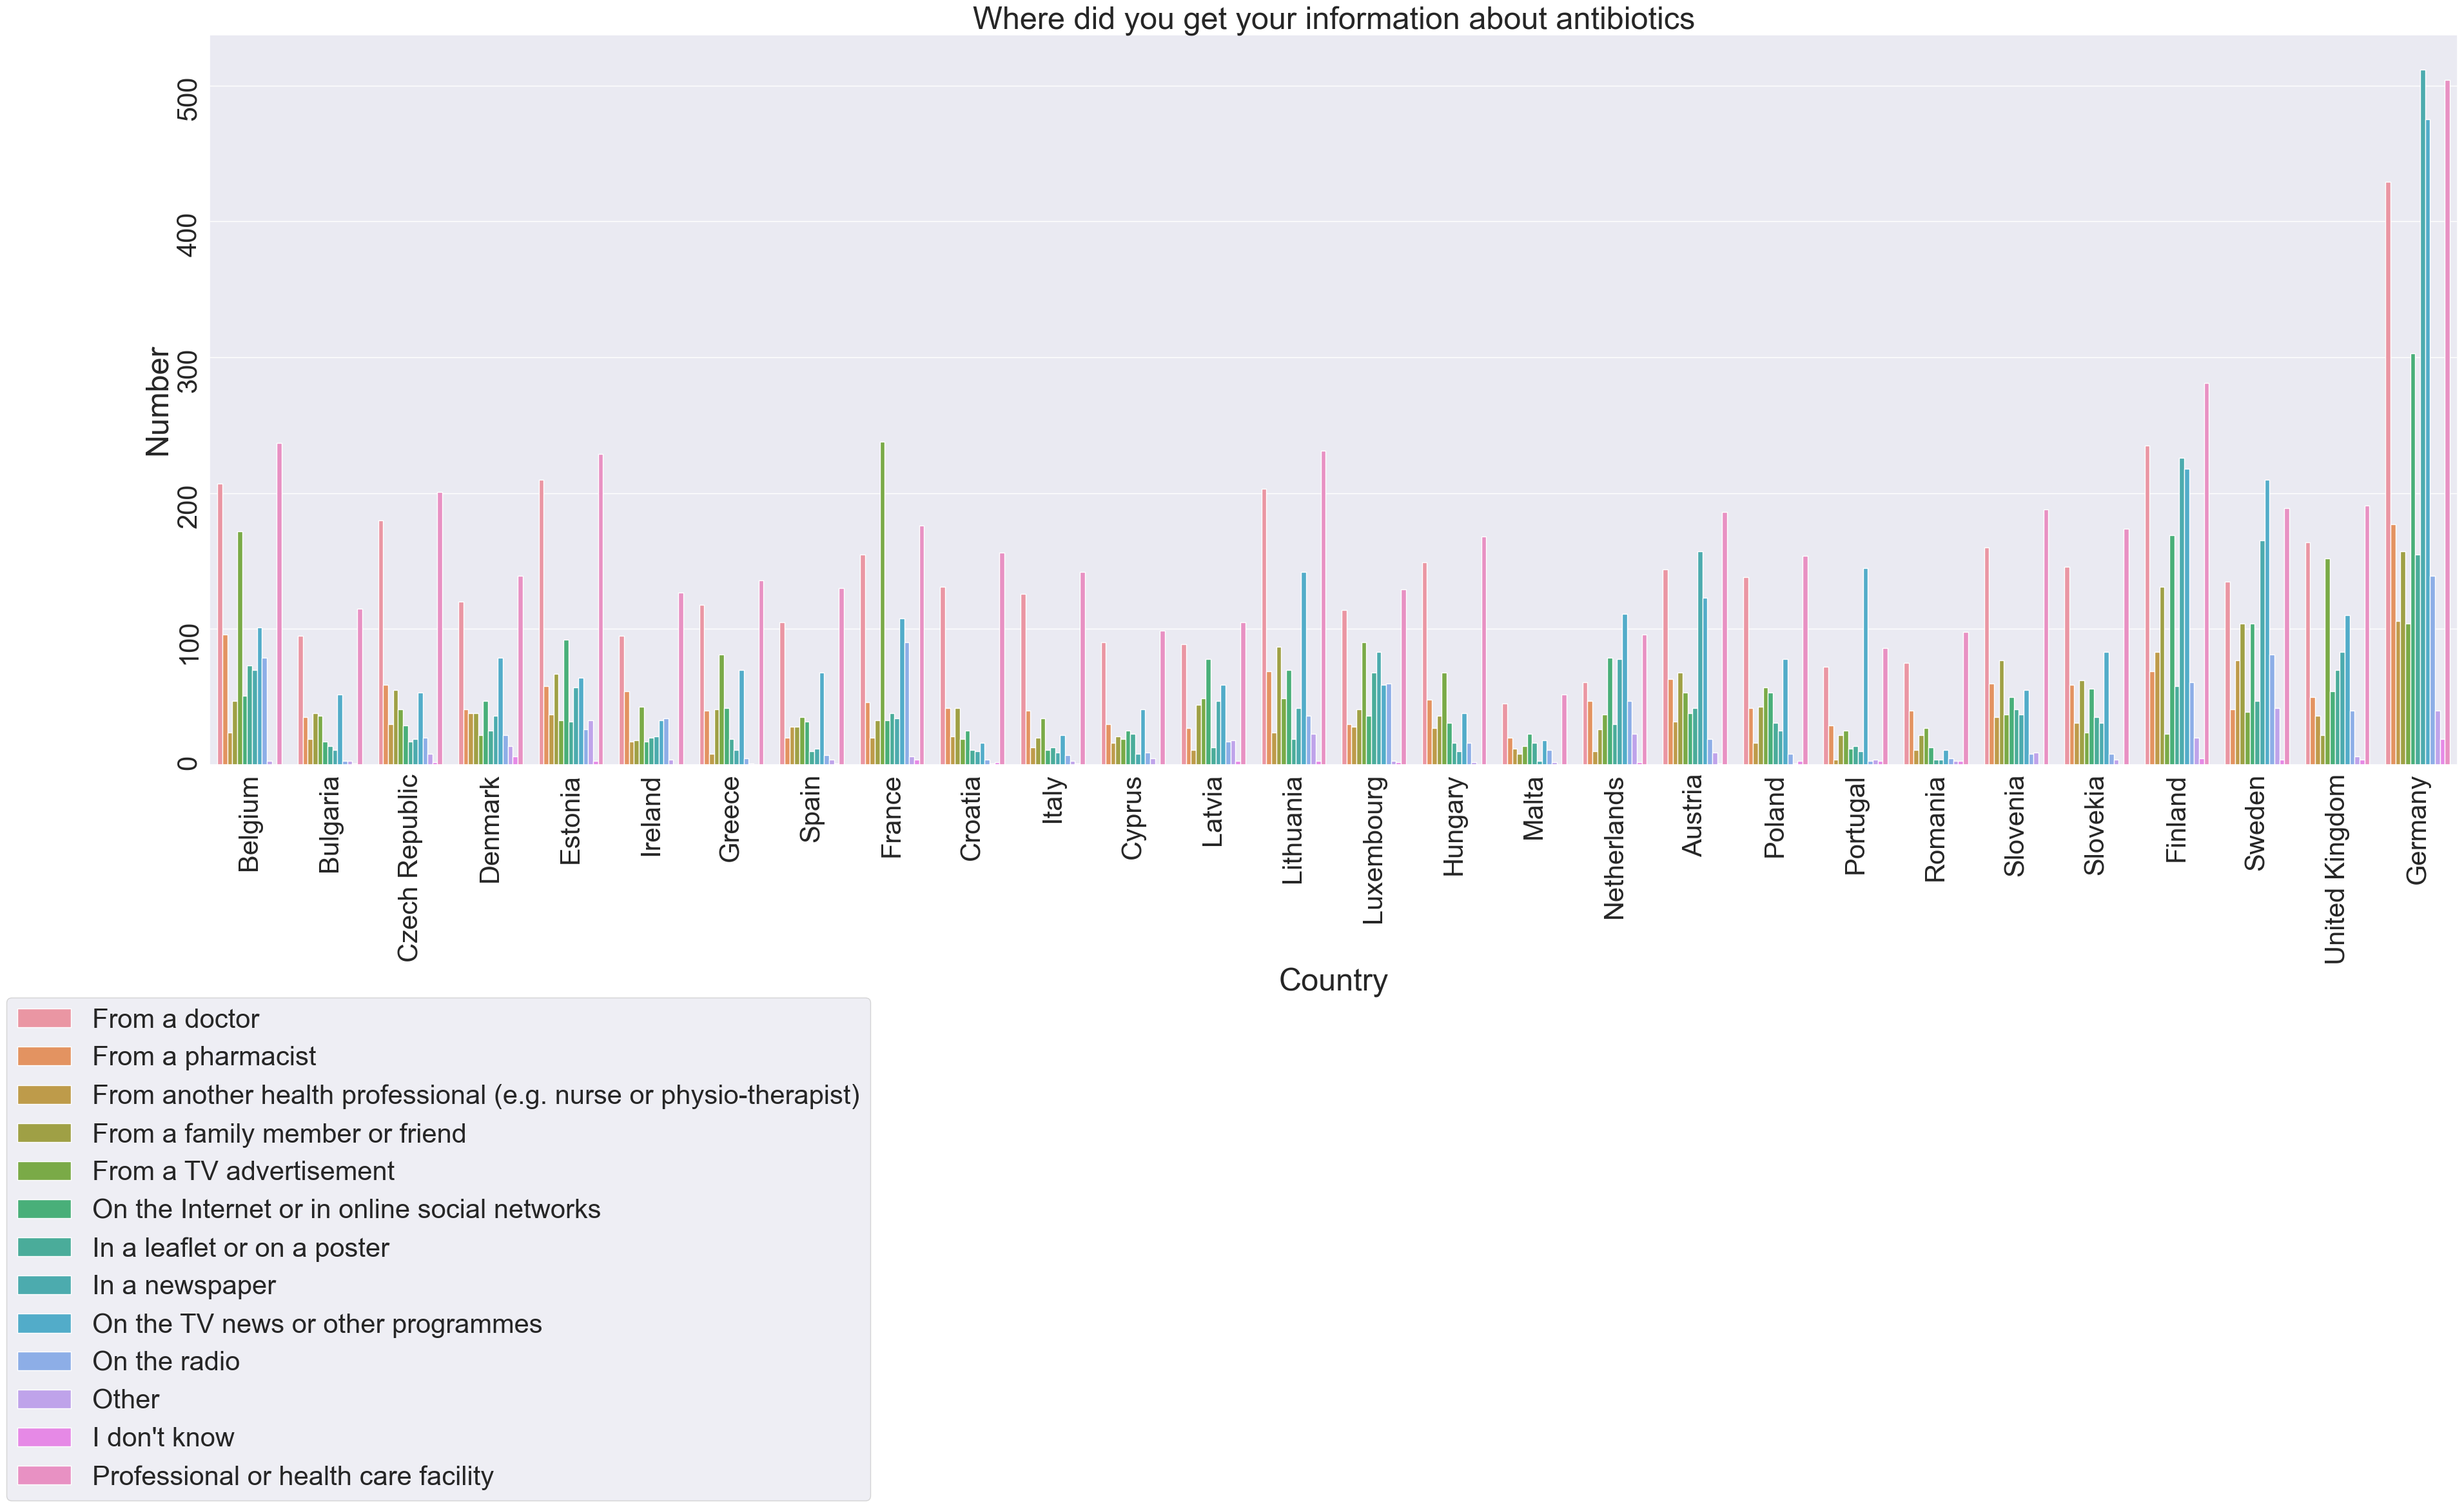

In [57]:
sheet_name = "QC8"
Question_8 = read_sheet(sheet_name)
Question_8 =Question_8.loc[[ "Un médecin vous en a parlé", "Un pharmacien vous en a parlé",
                            "Un autre professionnel de la santé (p. ex., une infirmière, un kinésithérapeute) vous en a parlé",
                            "Un membre de votre famille ou un ami vous en a parlé", "Vous l'avez vue dans une publicité à la télévision",
                            "Vous l'avez vue sur Internet ou les réseaux sociaux en ligne","Vous l'avez vue dans une brochure ou sur une affiche",
                            "Vous l'avez lue dans un journal", "Vous l'avez vue au journal télévisé ou dans un autre programme", 
                            "Vous l'avez entendue à la radio", 
                            "Autre (SPONTANÉ)", "NSP", "Professionnel ou établissement de santé"]]
Question_8= Question_8.rename(index= { "Un médecin vous en a parlé":"From a doctor",
                                      "Un pharmacien vous en a parlé":"From a pharmacist",
                            "Un autre professionnel de la santé (p. ex., une infirmière, un kinésithérapeute) vous en a parlé":"From another health professional (e.g. nurse or physio-therapist)",
                            "Un membre de votre famille ou un ami vous en a parlé":"From a family member or friend",
                            "Vous l'avez vue dans une publicité à la télévision": "From a TV advertisement",
                            "Vous l'avez vue sur Internet ou les réseaux sociaux en ligne": "On the Internet or in online social networks",
                            "Vous l'avez vue dans une brochure ou sur une affiche": "In a leaflet or on a poster",
                            "Vous l'avez lue dans un journal":"In a newspaper",
                            "Vous l'avez vue au journal télévisé ou dans un autre programme":"On the TV news or other programmes", 
                            "Vous l'avez entendue à la radio":"On the radio", 
                            "Autre (SPONTANÉ)": "Other", "NSP": "I don't know",
                            "Professionnel ou établissement de santé": "Professional or health care facility"})
Question_8 = merge_Germany(Question_8)
plot_hist(Question_8, "Where did you get your information about antibiotics");


There are various ways which the respondents reported obtaining their information from. The source may not be much of importance, but the authenticity of the information is.

# QC12 Which of the following sources of information would you use in order to get trustworthy information on antibiotics? (MAX. 3 ANSWERS)

Question 12 addresses the source of antibiotics information that the respondent could trust

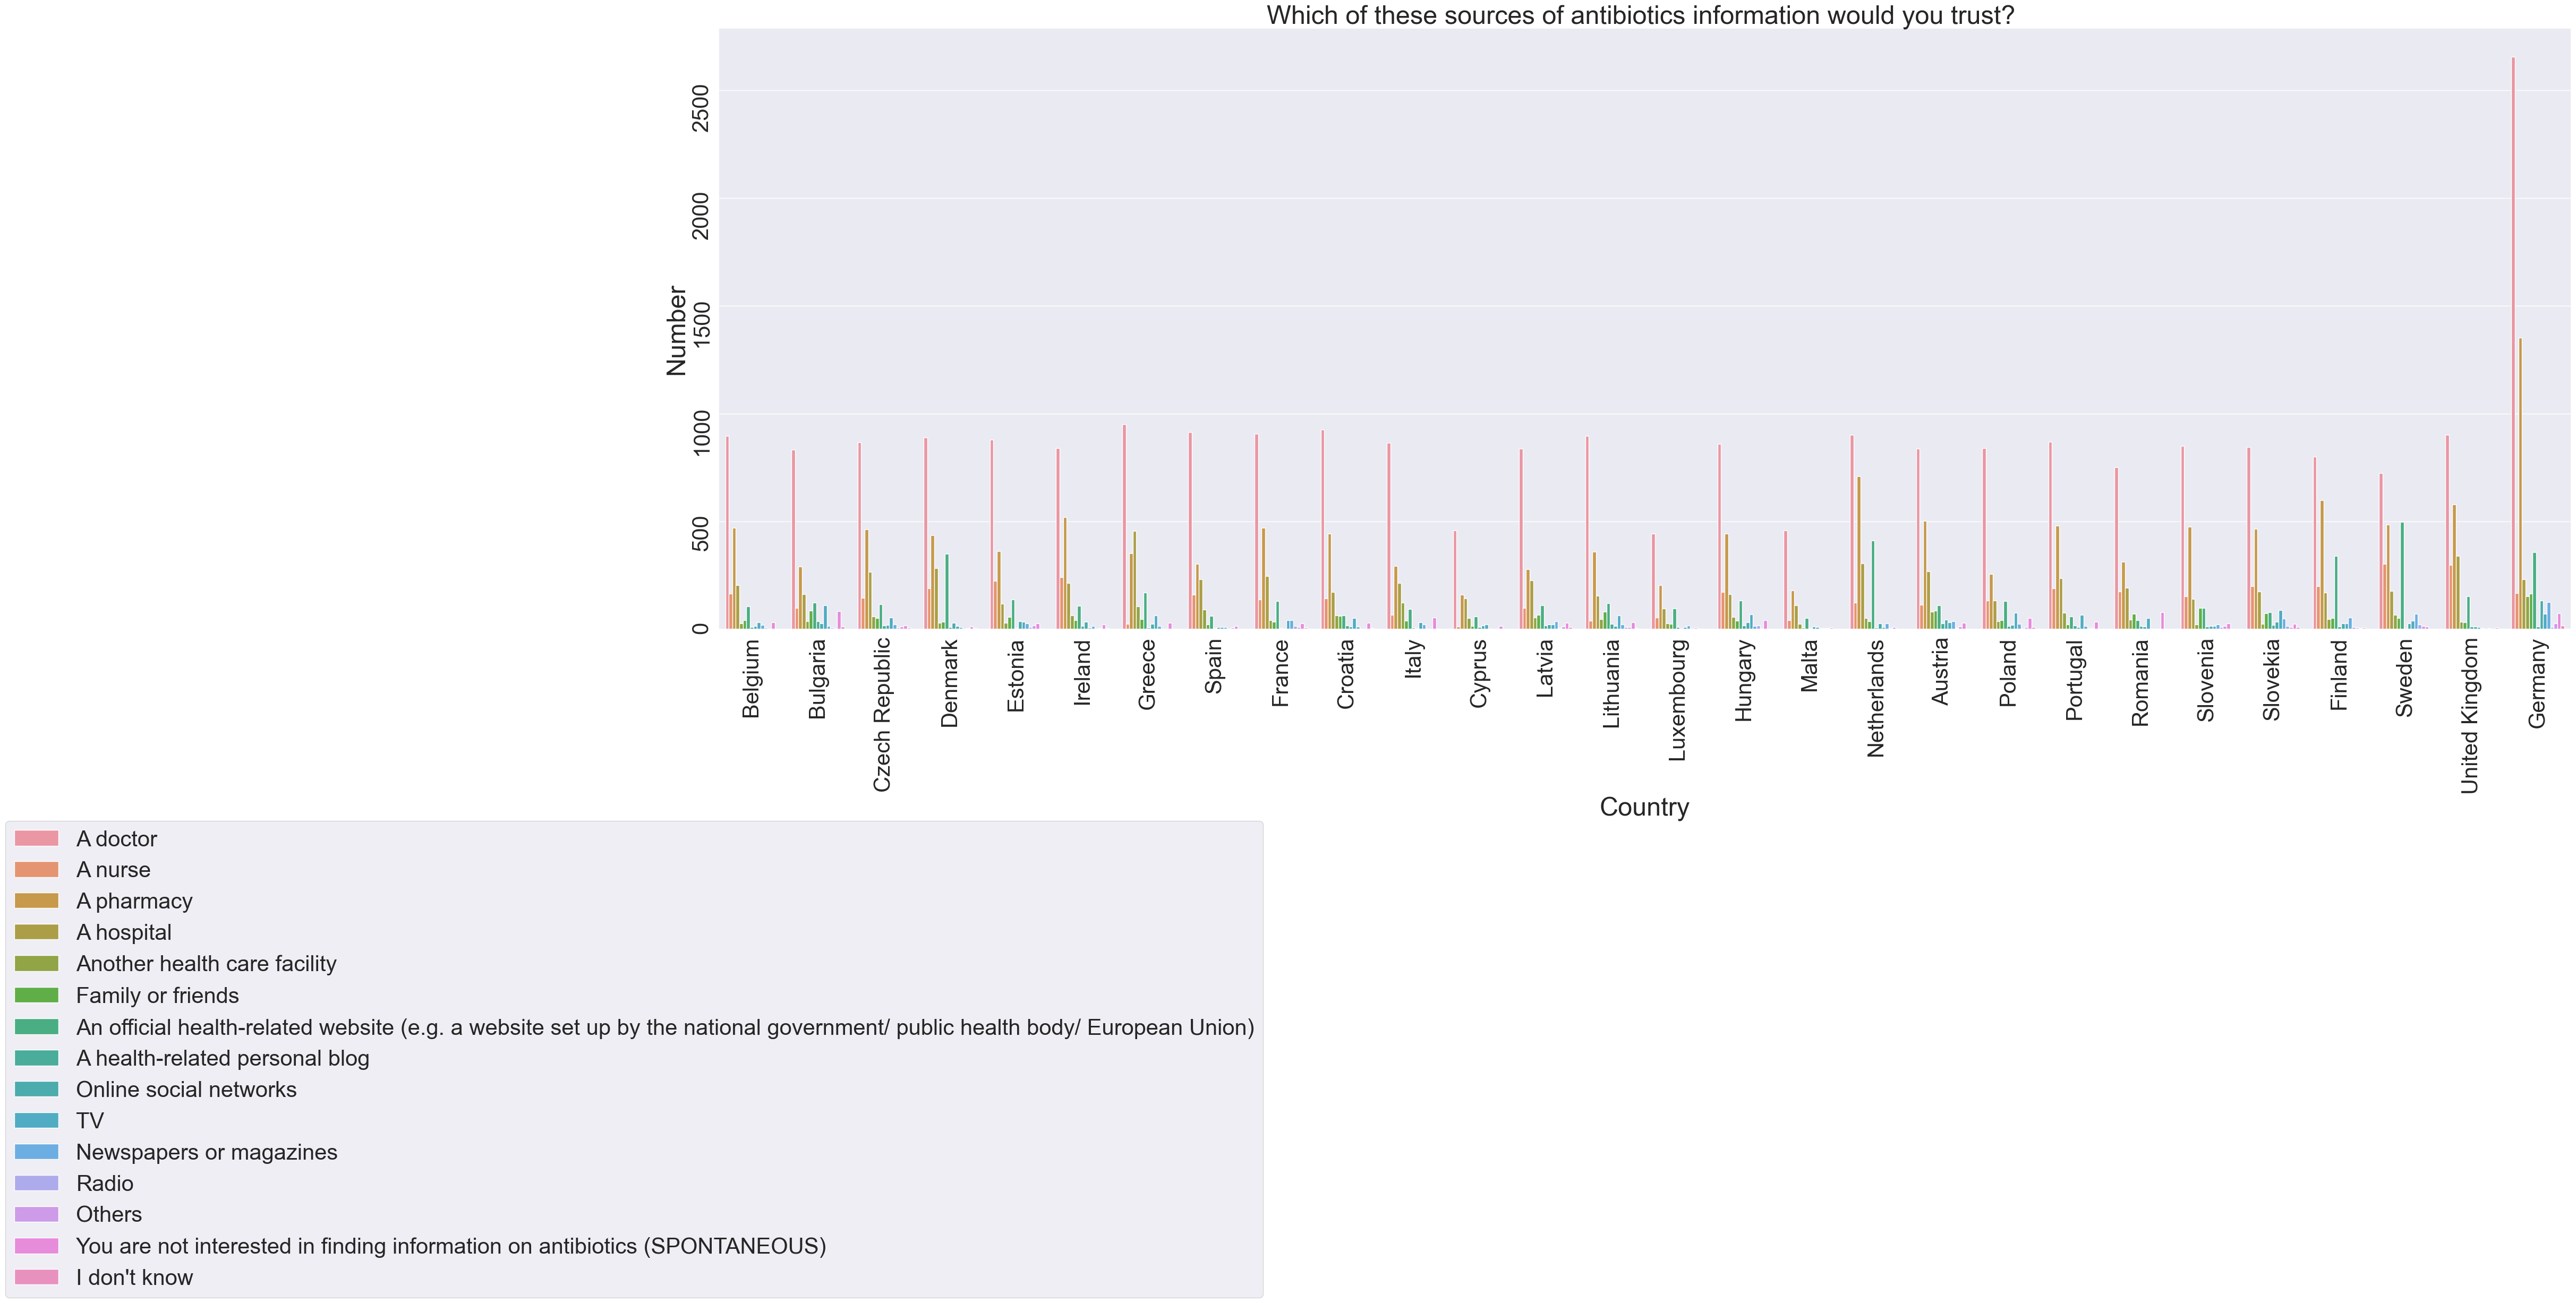

In [58]:
sheet_name = "QC12"
Question_12 = read_sheet(sheet_name)
Question_12 =Question_12.loc[["Un médecin", "Un(e) infirmier/infirmière", "Une pharmacie", "Un hôpital",
                             "Un autre établissement de santé", "La famille ou des amis", 
                             "Un site Internet officiel lié à la santé (par ex. site du Gouvernement national/ de l’institut national de santé publique/ de l’Union européenne)",
                             "Un blog personnel lié à la santé", "Un réseau social en ligne" ,"La télévision", 
                             "Un journal ou un magazine", "La radio", "Autre (SPONTANÉ)",
                             "Vous ne recherchez pas d'informations sur les antibiotiques (SPONTANÉ)", "NSP"]]
Question_12= Question_12.rename(index= {"Un médecin":"A doctor", "Un(e) infirmier/infirmière":"A nurse", "Une pharmacie": "A pharmacy", "Un hôpital": "A hospital",
                             "Un autre établissement de santé": "Another health care facility", "La famille ou des amis": "Family or friends", 
                             "Un site Internet officiel lié à la santé (par ex. site du Gouvernement national/ de l’institut national de santé publique/ de l’Union européenne)": "An official health-related website (e.g. a website set up by the national government/ public health body/ European Union)",
                             "Un blog personnel lié à la santé" : "A health-related personal blog", "Un réseau social en ligne":"Online social networks" ,"La télévision": "TV", 
                             "Un journal ou un magazine":"Newspapers or magazines", "La radio":"Radio", "Autre (SPONTANÉ)":"Others",
                             "Vous ne recherchez pas d'informations sur les antibiotiques (SPONTANÉ)":"You are not interested in finding information on antibiotics (SPONTANEOUS)", "NSP":"I don't know"})
Question_12 = merge_Germany(Question_12)
plot_hist(Question_12, "Which of these sources of antibiotics information would you trust? ");

The visualization is poor, so I would use raw code to properly visualize the data

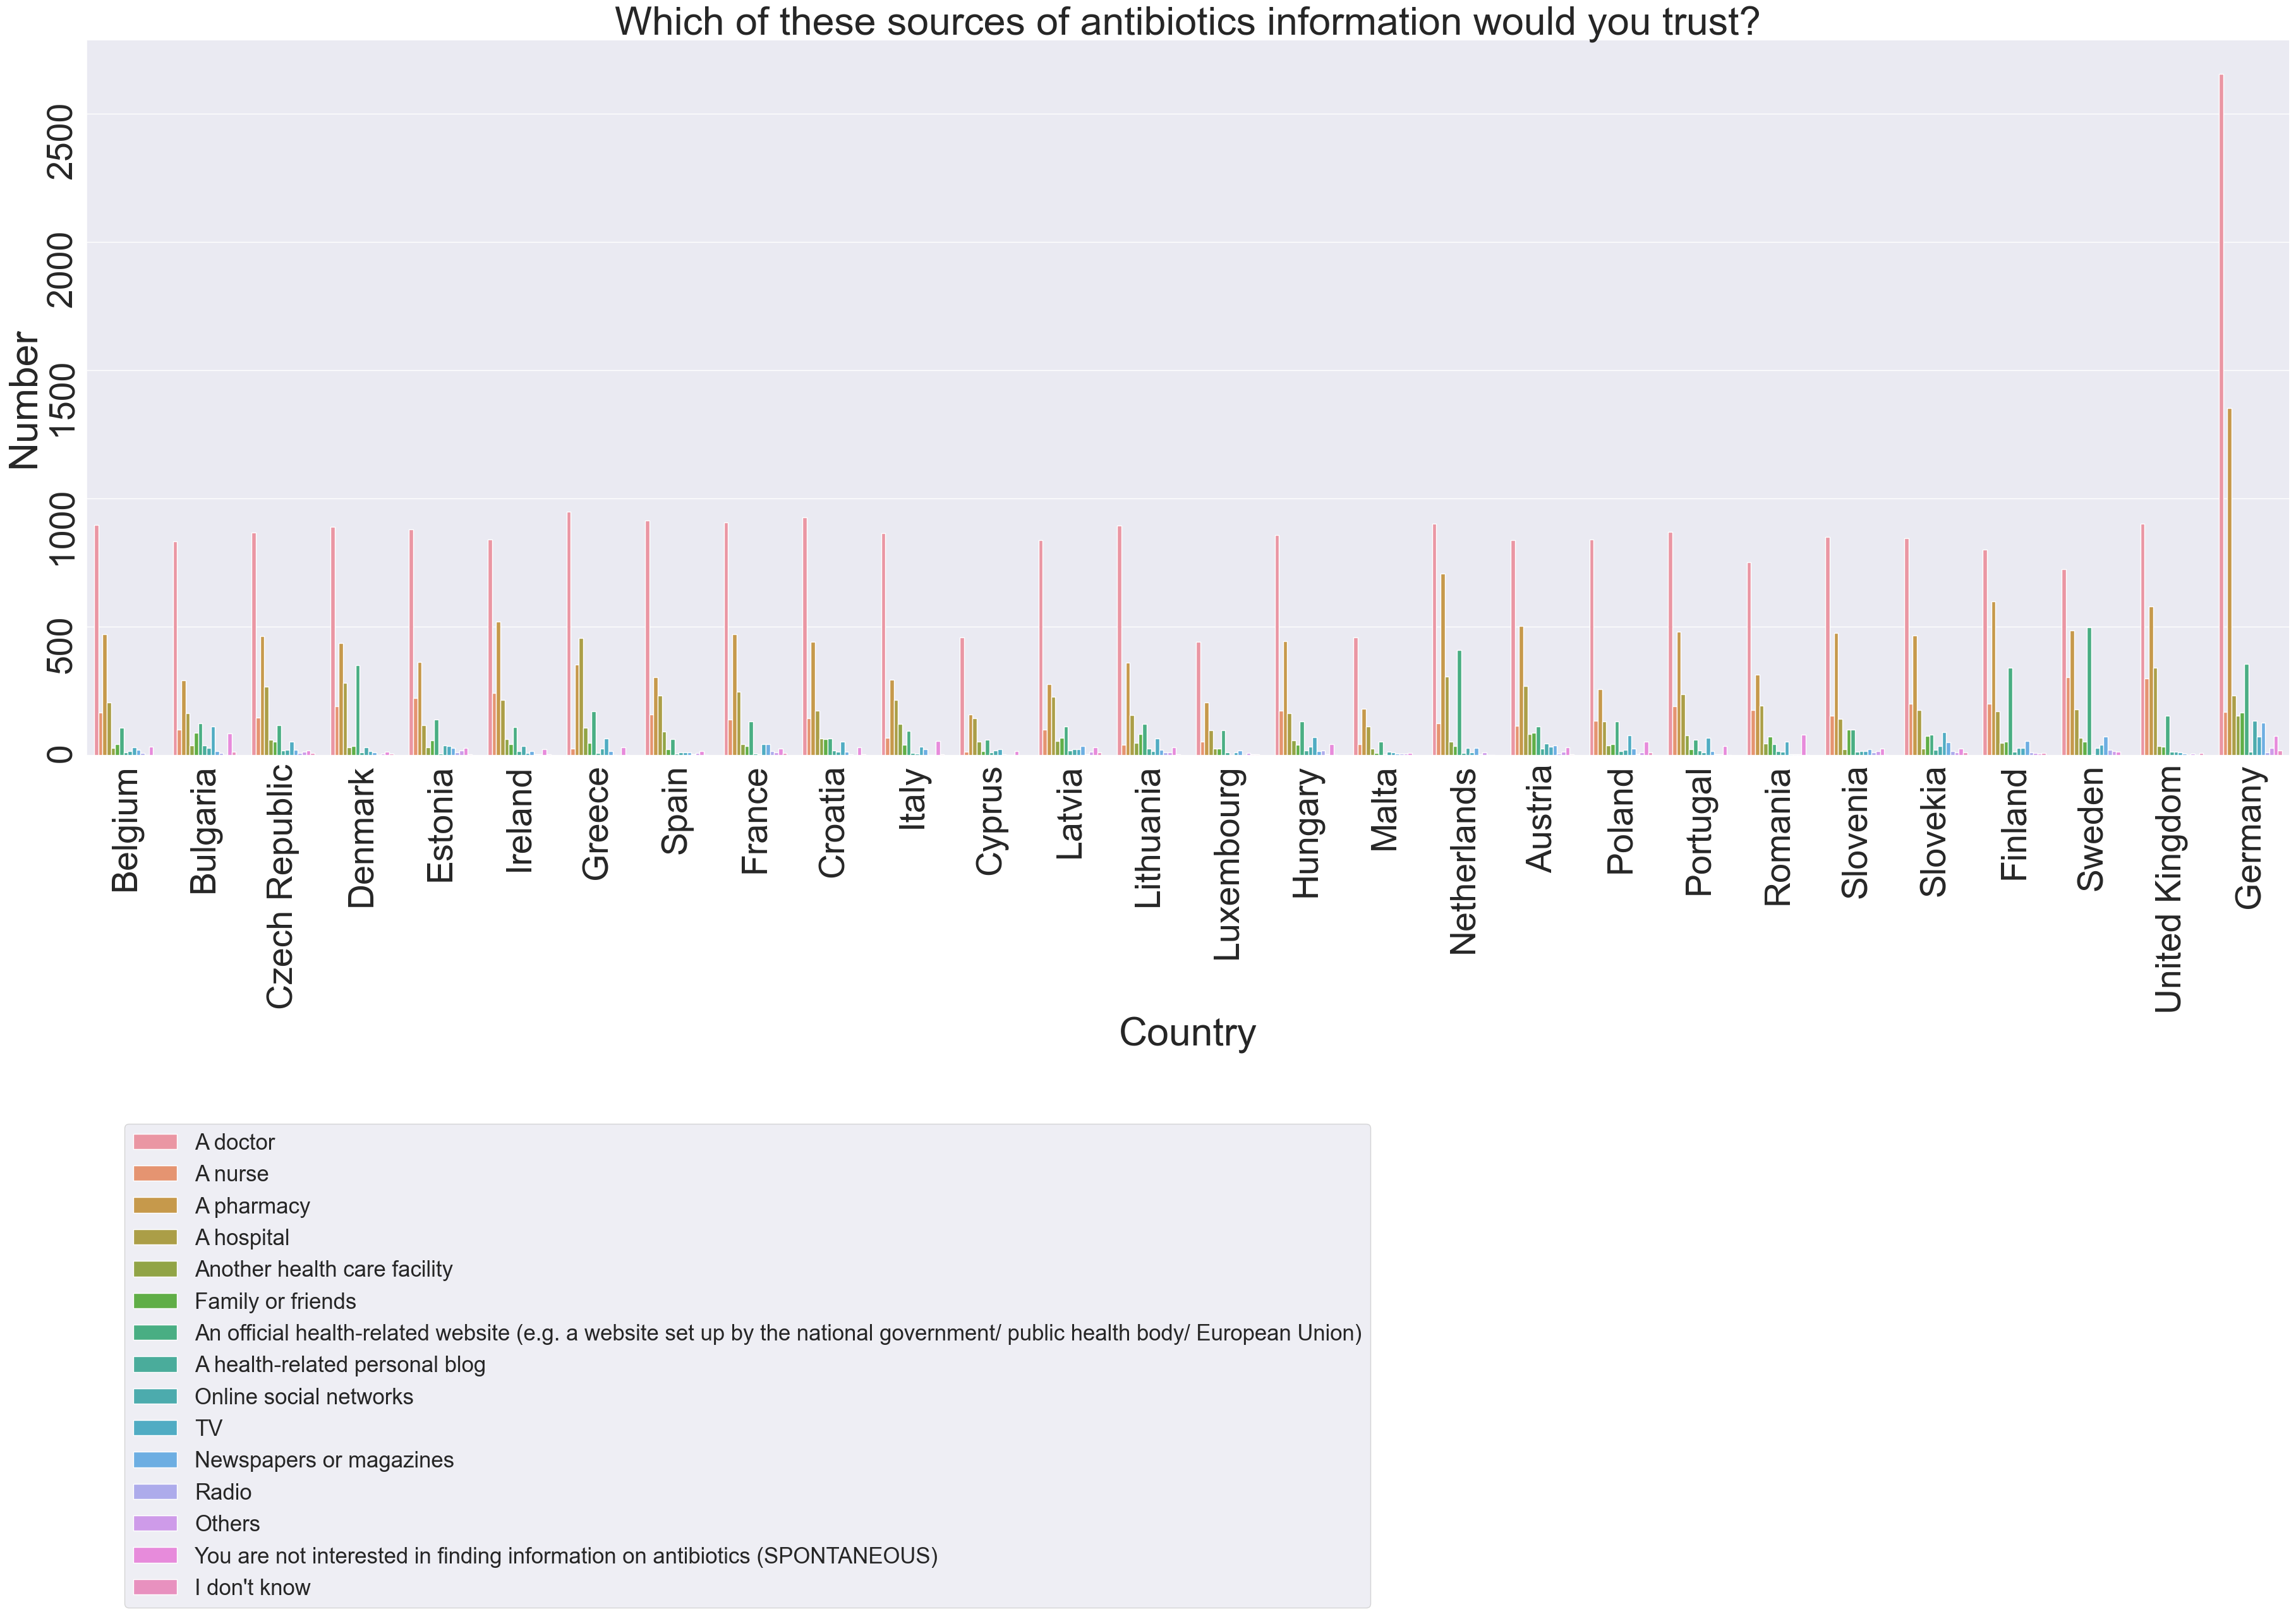

In [59]:
fig, ax =plt.subplots(figsize= (45,15), dpi = 100)
sns.set_theme(style="darkgrid")
ax = sns.barplot(x="Country", y="Number", hue="Response", data=Question_12)
ax.set_title("Which of these sources of antibiotics information would you trust?", fontdict = {"fontsize":45})
ax.set_xlabel("Country", fontsize = 45)
ax.set_ylabel("Number", fontsize = 45)
ax.tick_params( labelsize = 40, rotation = 90)
ax.legend( loc= "upper center", bbox_to_anchor=(0.3, -0.5),fontsize = 25)
ax.grid(linewidth= 4, which = "minor");

Doctors, nurses, pharmacies and hospitals top the chart of trustworthy sources of antibiotics information

# QC15 Did you know that using antibiotics to stimulate growth in farm animals is banned within the EU? 									


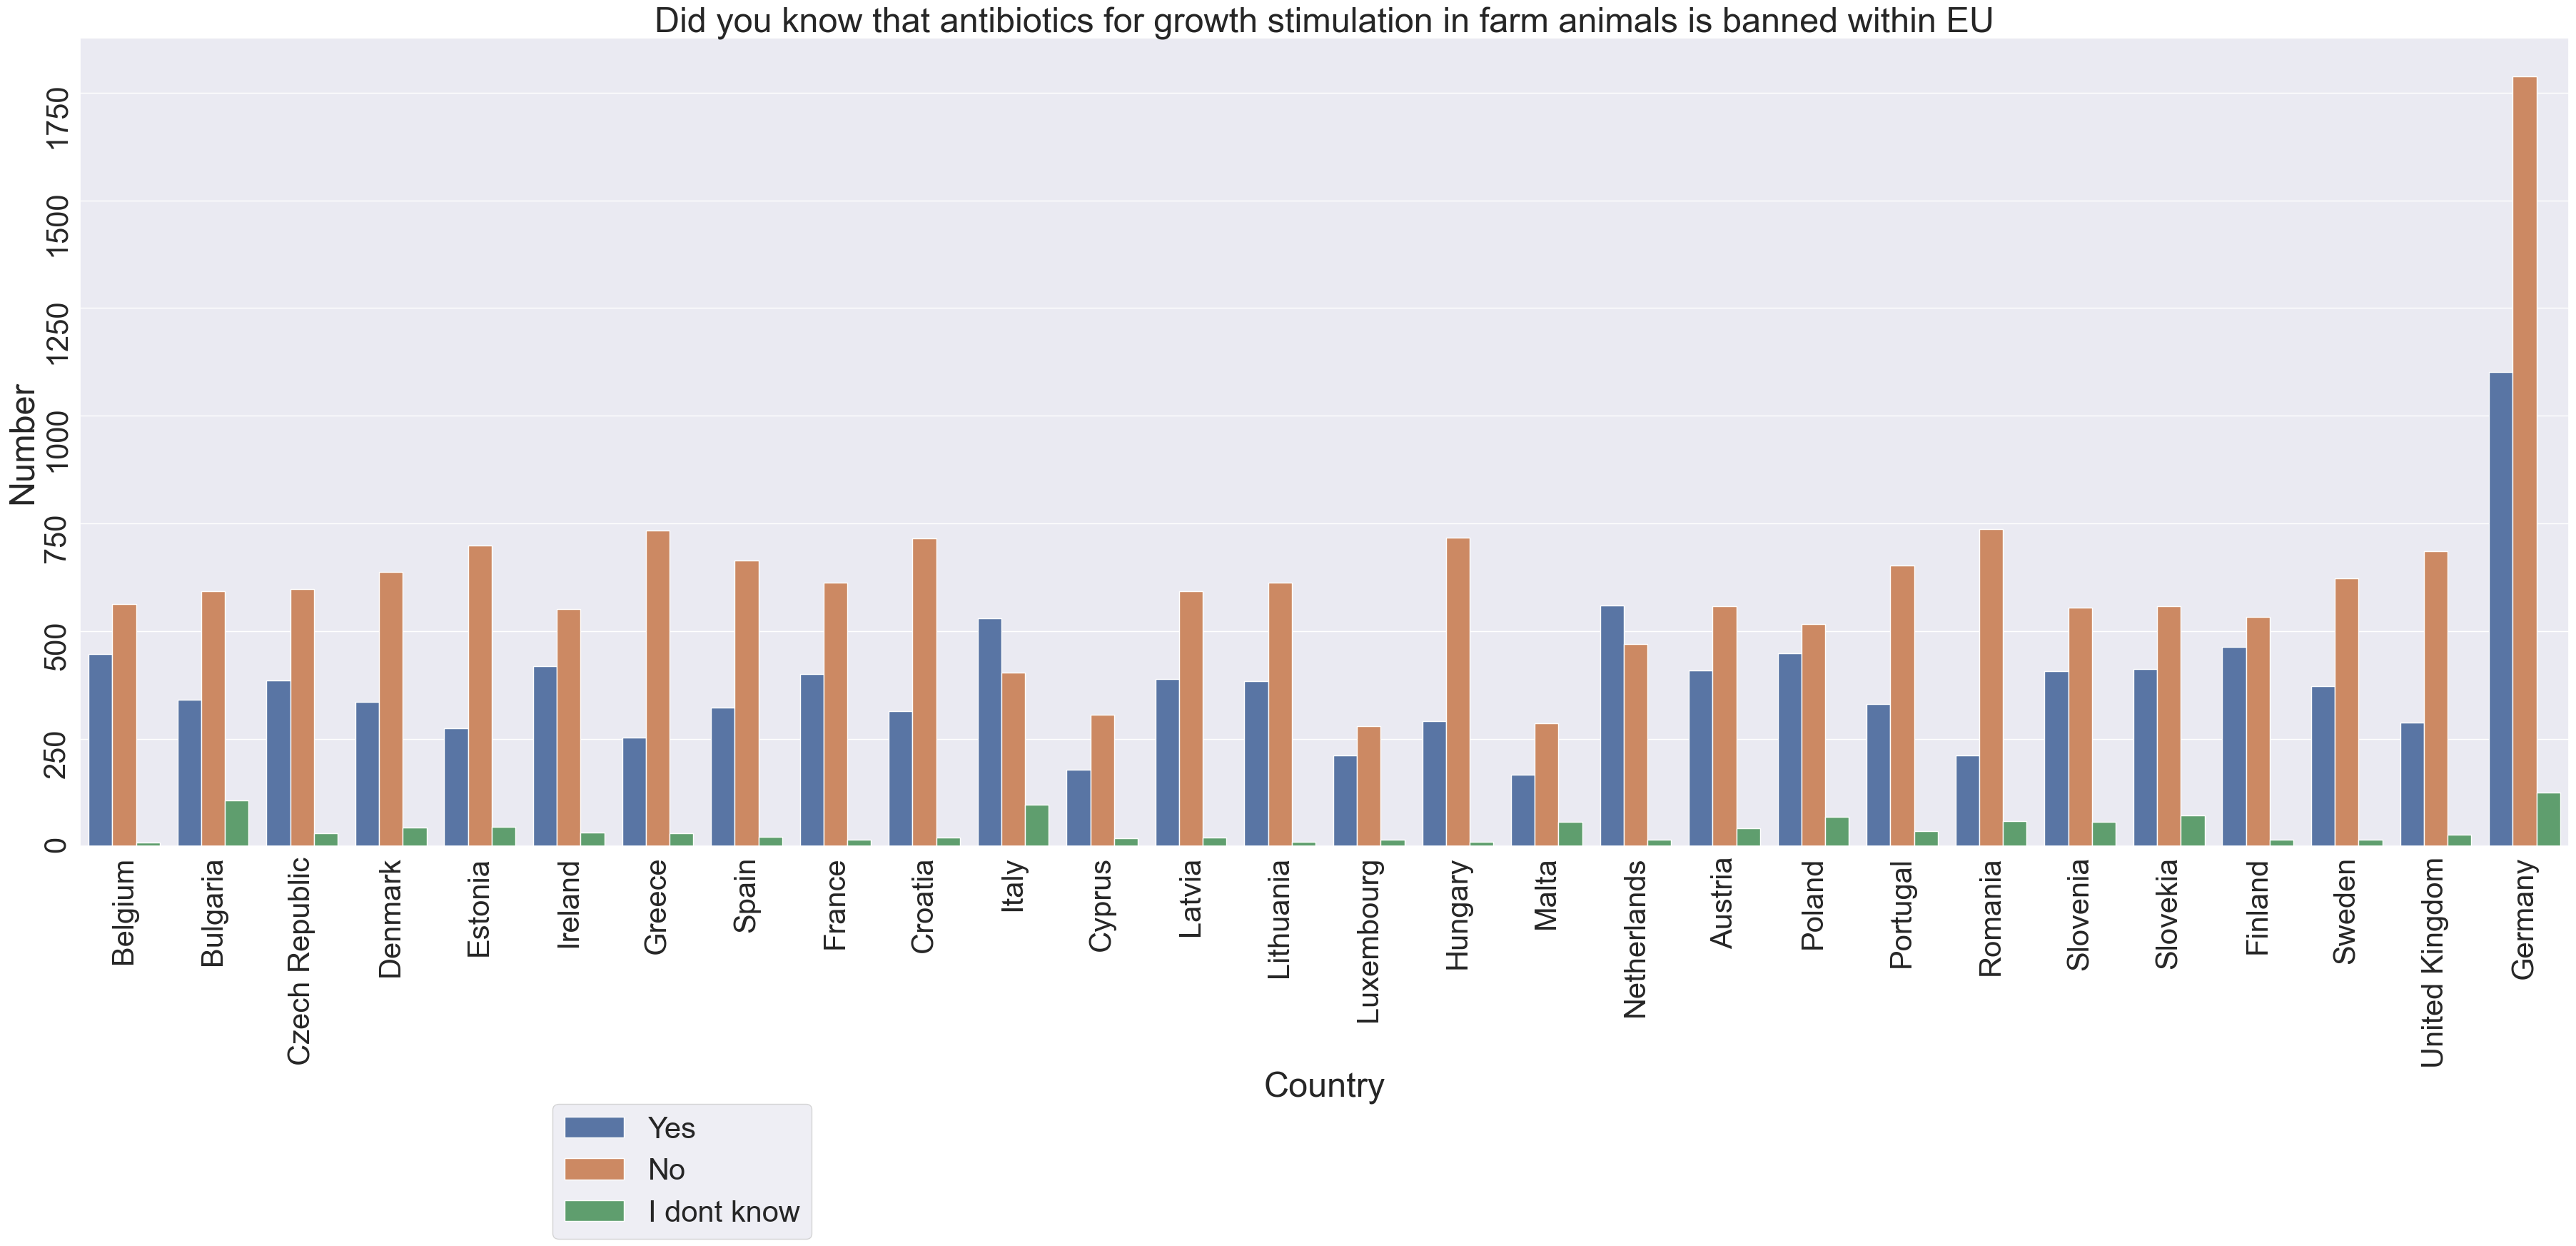

In [60]:
sheet_name = "QC15"
Question_15 = read_sheet(sheet_name)
Question_15 =Question_15.loc[["Oui", "Non", "NSP"]]
Question_15= Question_15.rename(index= {"Oui":"Yes", "Non":"No", "NSP":"I dont know"})
Question_15 = merge_Germany(Question_15)
plot_hist(Question_15, "Did you know that antibiotics for growth stimulation in farm animals is banned within EU");


The EU banned the use of antibiotics as growth promoters on January 1, 2006. Majority of the respondents were not aware of that at the time of the survey

Generally as can be seen from the data, the level of antibiotics information in the EU is high, however there is need for more work to be done as regards testing before antibiotics administration, access to antibiotics without prescription and information about the EU regulations and recommendations as regards antibiotics usage